# 1.-

First of all, before working with our selected dataset and performing the corresponding preprocessing and other analysis, it is fundamental to study with which kind of data we are working with. 

Then, with respect to the characteristics found in our dataset, we can visualize that we have 24 features in total (incuding name and status features, with which we will not be working with in the next sections). Additionally, we have a total number of 195 observations provided by the dataset.

 And, in order to know the nature of each feature, we included a specific cell with the command 'data.dtype', that will return us the list of features with its corresponding type format

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [113]:
#Loading our adta
data = pd.read_csv("parkinsons.csv") #we can change this database file if we want
pd.set_option('display.max_columns', None) # All columns
pd.set_option('display.max_rows', None) # All rows
data.head(-1)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.000030,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [114]:
print('Nº of observations = ', data.shape[0], ' and nº of features = ', data.shape[1] )

Nº of observations =  195  and nº of features =  24


## Our label classification 

In [115]:
print('1 = Parkinson, 0 = Healthy')
print('')
print(data["status"].value_counts())

1 = Parkinson, 0 = Healthy

1    147
0     48
Name: status, dtype: int64


#### Nature of feature

In [5]:
data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

* Link of the database:
    * https://archive.ics.uci.edu/ml/datasets/Parkinsons

## Attribute Information:

* ASCII subject name and recording number
    * name
* Average vocal fundamental frequency
    * MDVP:Fo(Hz)
* Maximum vocal fundamental frequency
    * MDVP:Fhi(Hz)    
* Minimum vocal fundamental frequency
    * MDVP:Flo(Hz)
* Several measures of variation in fundamental frequency
    * MDVP:Jitter(%)
    * MDVP:Jitter(Abs)
    * MDVP:RAP
    * MDVP:PPQ
    * Jitter:DDP
* Several measures of variation in amplitude
    * MDVP:Shimmer
    * MDVP:Shimmer(dB)
    * Shimmer:APQ3
    * Shimmer:APQ5
    * MDVP:APQ
    * Shimmer:DDA 
* Two measures of ratio of noise to tonal components in the voice
    * NHR
    * HNR 
* Health status of the subject (one) - Parkinson's, (zero) - healthy
    * status 
* Two nonlinear dynamical complexity measures
    * RPDE
    * D2 
* Signal fractal scaling exponent
    * DFA 
* Three nonlinear measures of fundamental frequency variation
    * spread1
    * spread2
    * PPE 

- - -

# 2.- EDA

In order to visualize the characteristics of our dataset, we are going to perform an expolartory database analysis, going through each of the points already seen in Lab 1.

Points to stand out are the description of our unbalanced data, the boxplots showing the chance of having outliers and finally the correlation matrix, presenting redundant features.

In [6]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


## Unbalanced data

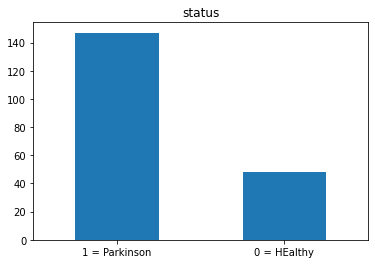

In [6]:
#Plot the number of cases (Parkinson) and control (Healthy)
hist_of_labels = data['status'].value_counts().plot.bar(title="status")
plt.xticks([0,1],  ['1 = Parkinson' , '0 = Healthy'] , rotation = 0)
plt.show()

## No missing values

In [7]:
print('Missing values in our Parkinson dataset?:', data.isnull().values.any())

Missing values in our Parkinson dataset?: False


In [8]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### Plots of each atribute

In [9]:
list_features = list(data.columns)
print(list_features)

['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


In [10]:
features_to_plot = list_features[1:]
print(features_to_plot)
print('')
features_to_plot.remove('status')
print(features_to_plot)   # Features of onterest for the ML algorithms

['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


## Correct number of bins . . .

In [11]:
for i in features_to_plot:
    n = len(pd.unique(data[i]))
    print('Number of unique values in column : ', i , ' = ' , n)

Number of unique values in column :  MDVP:Fo(Hz)  =  195
Number of unique values in column :  MDVP:Fhi(Hz)  =  195
Number of unique values in column :  MDVP:Flo(Hz)  =  195
Number of unique values in column :  MDVP:Jitter(%)  =  173
Number of unique values in column :  MDVP:Jitter(Abs)  =  19
Number of unique values in column :  MDVP:RAP  =  155
Number of unique values in column :  MDVP:PPQ  =  165
Number of unique values in column :  Jitter:DDP  =  180
Number of unique values in column :  MDVP:Shimmer  =  188
Number of unique values in column :  MDVP:Shimmer(dB)  =  149
Number of unique values in column :  Shimmer:APQ3  =  184
Number of unique values in column :  Shimmer:APQ5  =  189
Number of unique values in column :  MDVP:APQ  =  189
Number of unique values in column :  Shimmer:DDA  =  189
Number of unique values in column :  NHR  =  185
Number of unique values in column :  HNR  =  195
Number of unique values in column :  RPDE  =  195
Number of unique values in column :  DFA  =  19

#### As number of unique values is high, bins will be increased in order to plot histograms properly

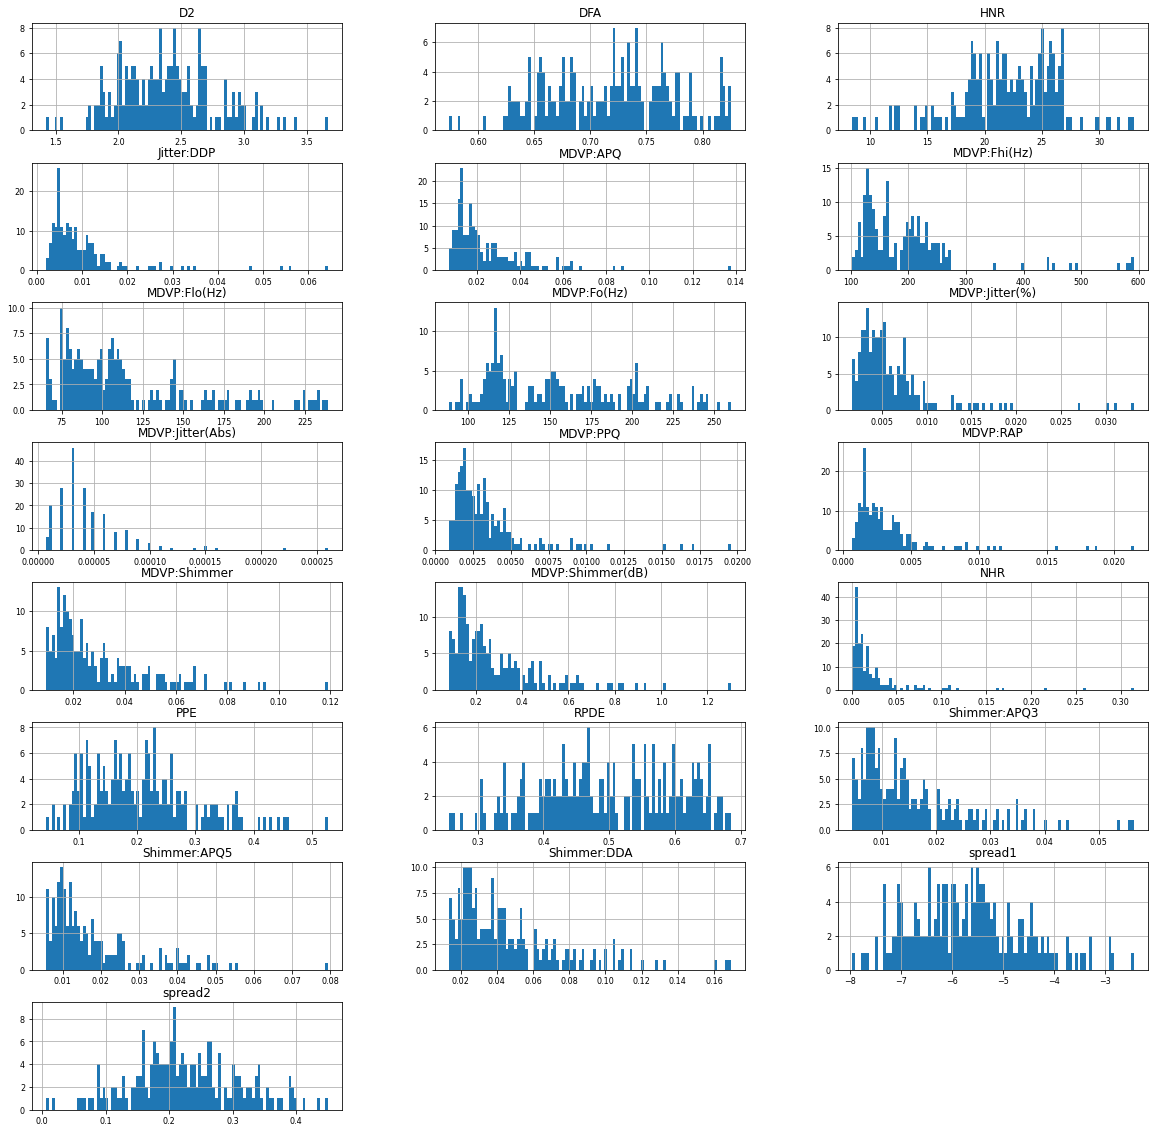

In [13]:
#histogram
Complete_histogram = data.hist(figsize=(20,20),layout=(8,3), bins = 100, column = features_to_plot, 
                               xlabelsize = 8, ylabelsize = 8)

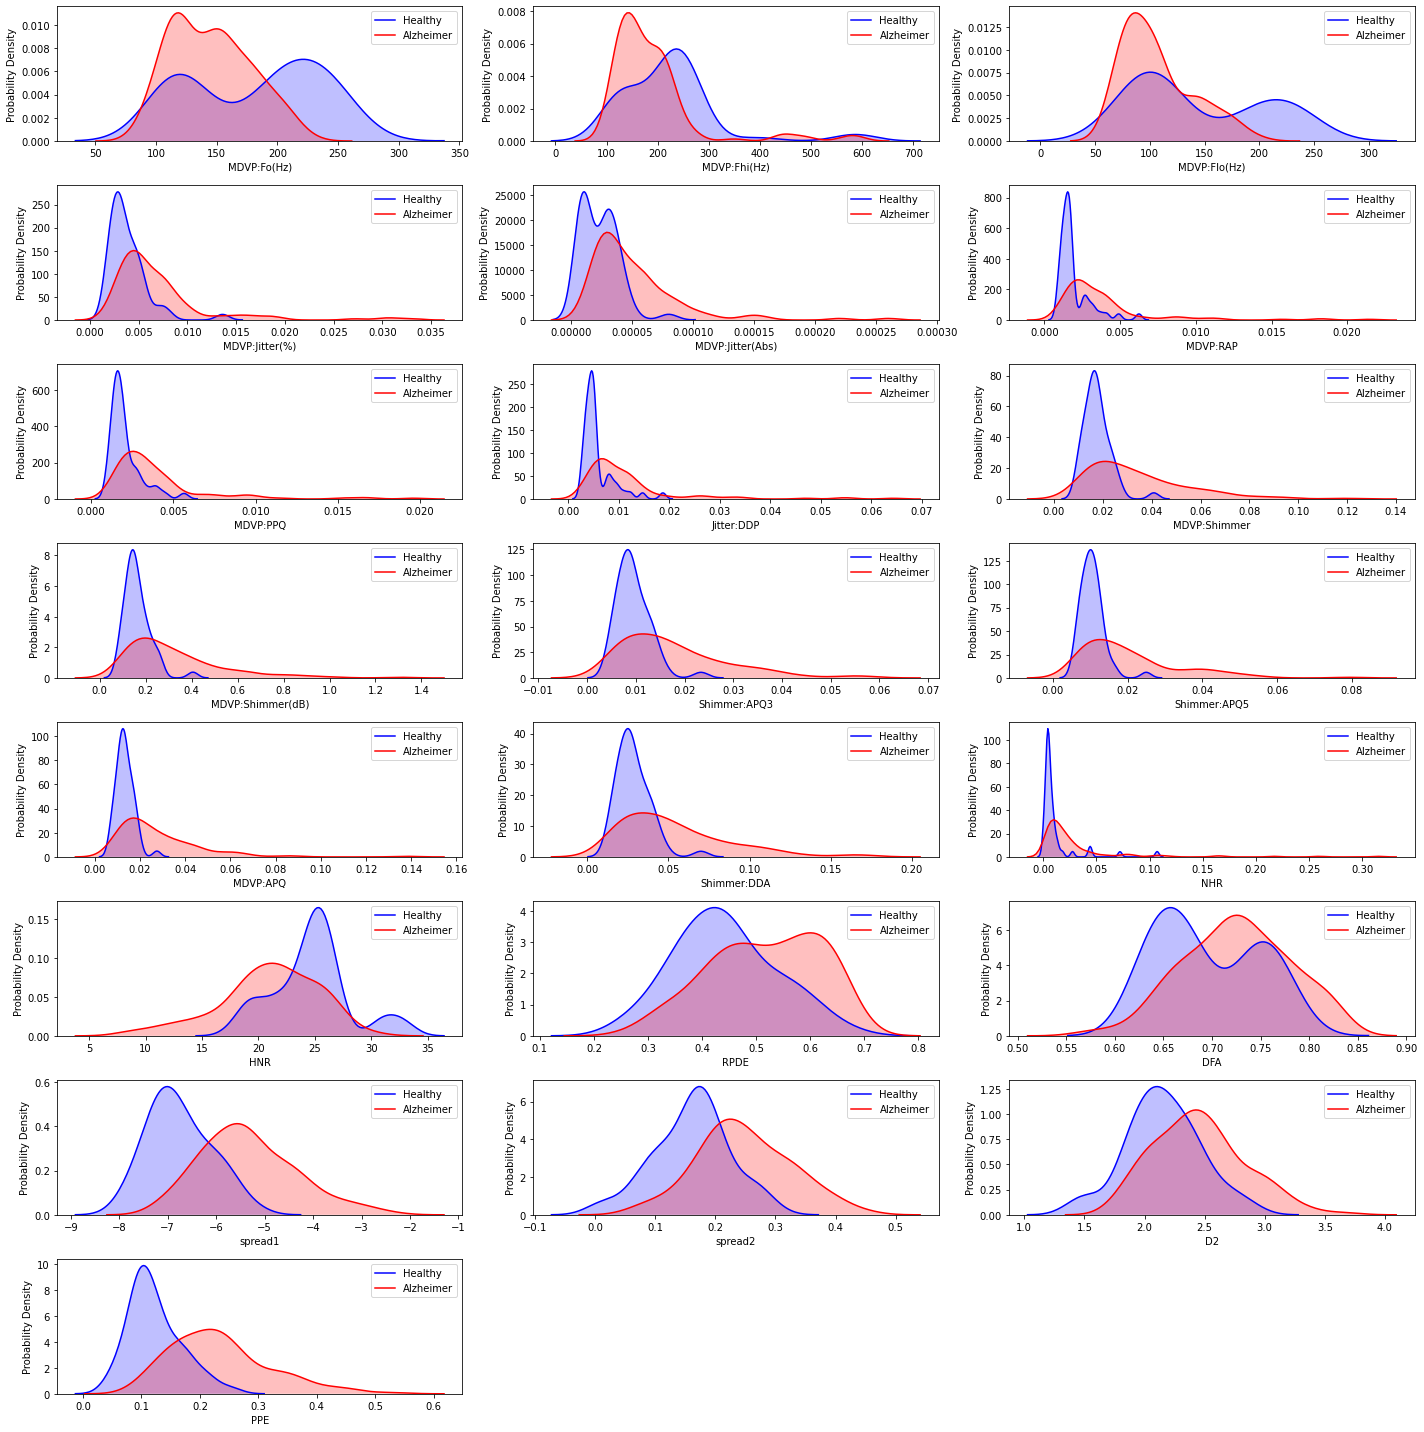

In [80]:
y_values = data.status.values
plt.figure(figsize=(20,20))
i = 1
for feature in features_to_plot:
    plt.subplot(8,3,i)
    # Plotting the KDE Plot 
    sns.kdeplot(data.loc[(data['status'] == 0), 
                feature ], color='b', shade=True, Label='Healthy') 

    sns.kdeplot(data.loc[(data['status']== 1),  
                feature], color='r', shade=True, Label='Alzheimer') 
    plt.xlabel(feature) 
    plt.ylabel('Probability Density') 
    i += 1
plt.tight_layout()

## Possible presence of outliers 

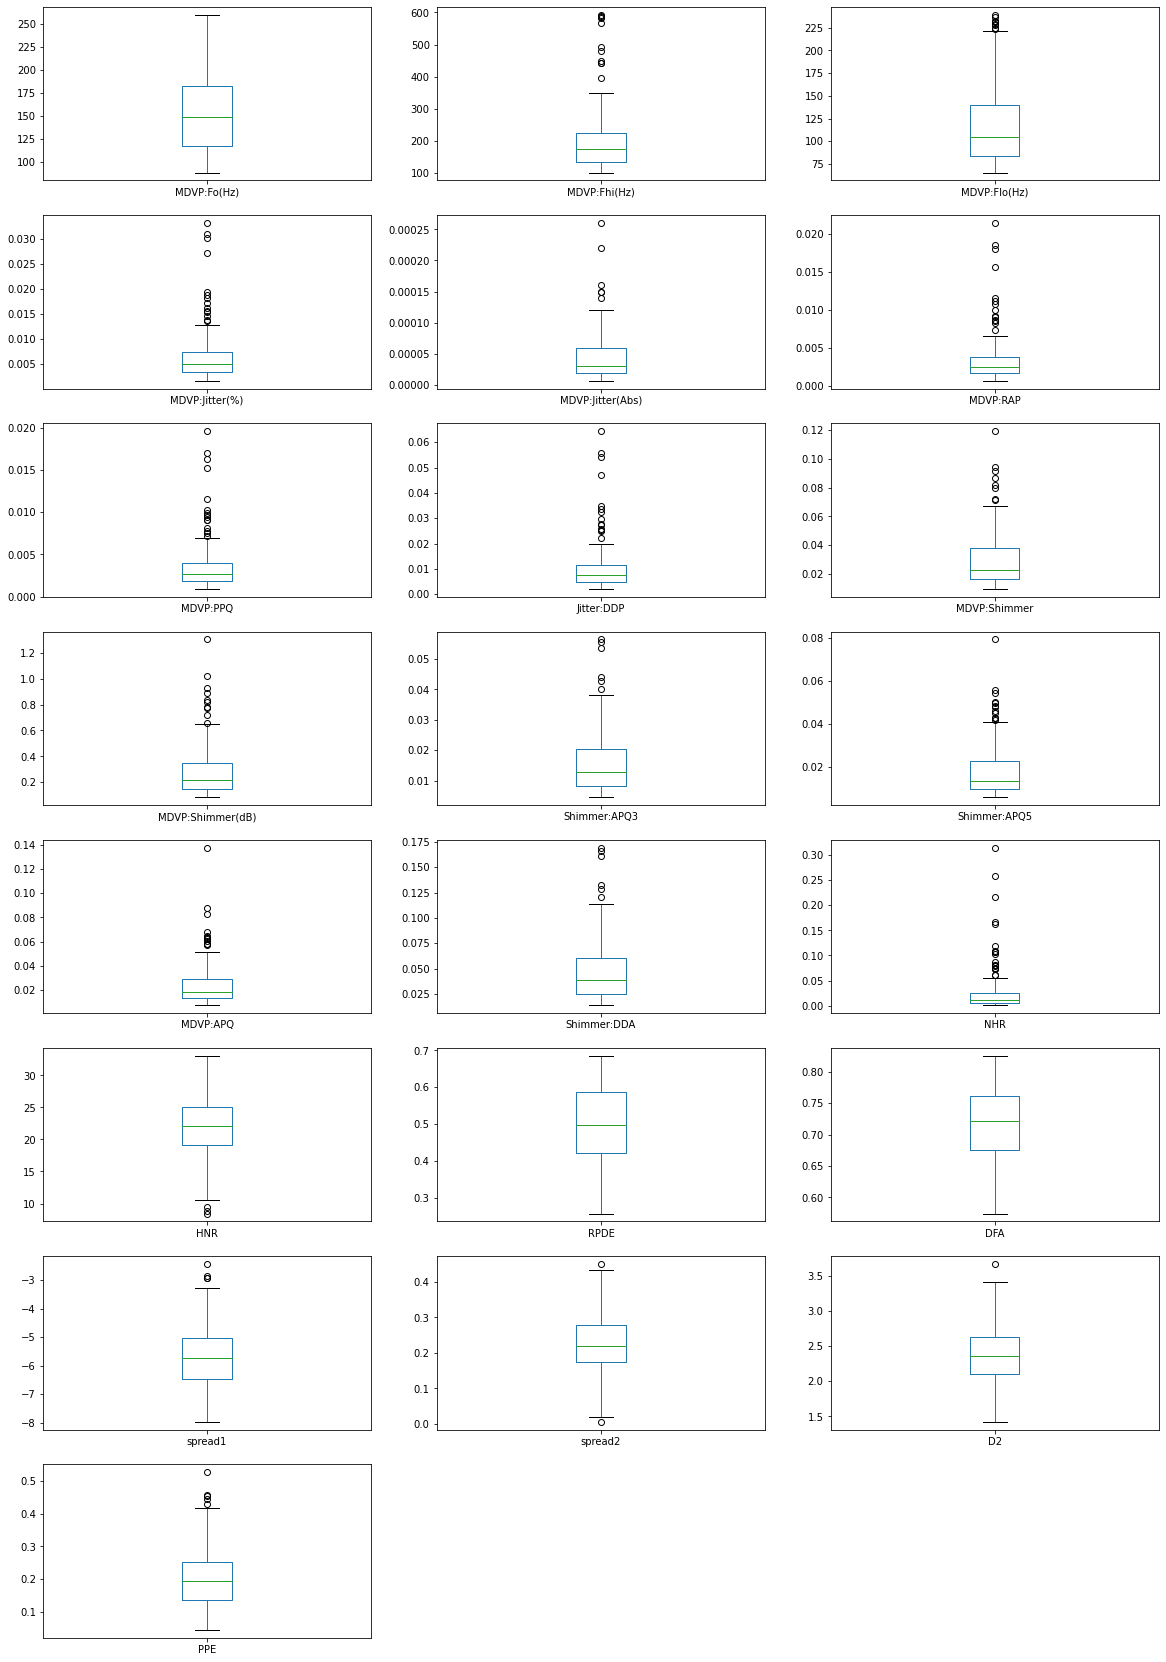

In [50]:
#box-plot
data[features_to_plot].plot(kind='box', subplots=True, layout=(8,3), sharex = False, sharey = False, figsize=(20,30))
plt.show() 

## Outliers detection

In [12]:
for feature in features_to_plot:
    
    outliers = []
    
    attribute = data[feature].values
    mean_attribute = np.mean(attribute)
    std_attribute = np.std(attribute)

    print('Mean of :', feature , ' = ' , mean_attribute, 'and the Std of ',
          feature , ' = ' , std_attribute)

    #Calculation of the outliers
    for i in attribute:
        z_attribute = (i-mean_attribute)/std_attribute
        if z_attribute > 3:
            outliers.append(i)
        if z_attribute < (-3) and i != 0:
            outliers.append(i)
    print('Outlier in ', feature , ' = ' ,len(outliers))
    print('')

Mean of : MDVP:Fo(Hz)  =  154.22864102564102 and the Std of  MDVP:Fo(Hz)  =  41.283799965906525
Outlier in  MDVP:Fo(Hz)  =  0

Mean of : MDVP:Fhi(Hz)  =  197.10491794871797 and the Std of  MDVP:Fhi(Hz)  =  91.25665238831346
Outlier in  MDVP:Fhi(Hz)  =  7

Mean of : MDVP:Flo(Hz)  =  116.32463076923077 and the Std of  MDVP:Flo(Hz)  =  43.40967637841882
Outlier in  MDVP:Flo(Hz)  =  0

Mean of : MDVP:Jitter(%)  =  0.006220461538461538 and the Std of  MDVP:Jitter(%)  =  0.004835686602250747
Outlier in  MDVP:Jitter(%)  =  4

Mean of : MDVP:Jitter(Abs)  =  4.395897435897436e-05 and the Std of  MDVP:Jitter(Abs)  =  3.473250688973511e-05
Outlier in  MDVP:Jitter(Abs)  =  5

Mean of : MDVP:RAP  =  0.003306410256410257 and the Std of  MDVP:RAP  =  0.0029601549571181603
Outlier in  MDVP:RAP  =  4

Mean of : MDVP:PPQ  =  0.003446358974358974 and the Std of  MDVP:PPQ  =  0.002751893254928691
Outlier in  MDVP:PPQ  =  4

Mean of : Jitter:DDP  =  0.009919948717948717 and the Std of  Jitter:DDP  =  0.008

## Redundant features

When we identify features as redundants, we are looking for the ones that have an ideal linear relation between them. So, at the end, when performing our algorithm, it may end up providing not the most accurate and reliable result possible.

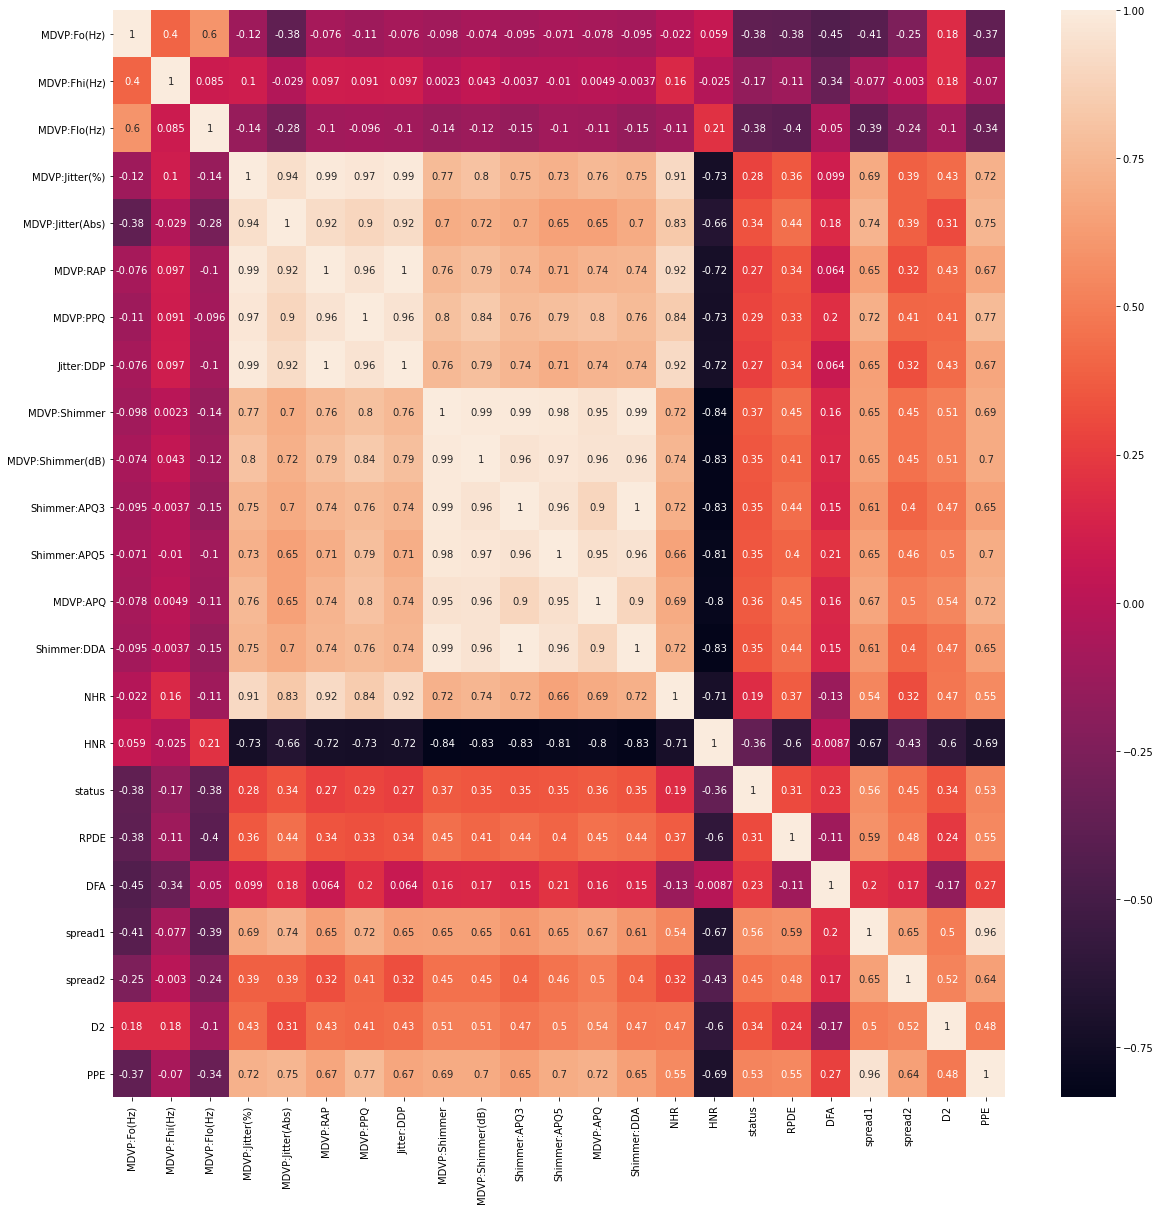

In [15]:
f, ax = plt.subplots(figsize=(20,20))
corr = data.corr()
heatmap = sns.heatmap(corr, annot=True,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

- - -

# 3.- Pre-processing of the database

## Dropping unnecessary columns

In [13]:
list_features = list(data.columns)
print(list_features)

features_to_plot = list_features[1:]
print('')
features_to_plot.remove('status')  # Features of interest without names and status
print(features_to_plot)

['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


Looking on the correlation matrix, we identified features with the linear relation equal to 1, so that we can drop them from the database and then avoiding any possible mistake later on.

In [14]:
# Drop unnecesary columns
data = data.drop(columns = ['MDVP:RAP', 'Shimmer:APQ3'])

In [15]:
list_features = list(data.columns)
print(list_features)

features_to_plot = list_features[1:]
print('')
features_to_plot.remove('status')
print(features_to_plot)

['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


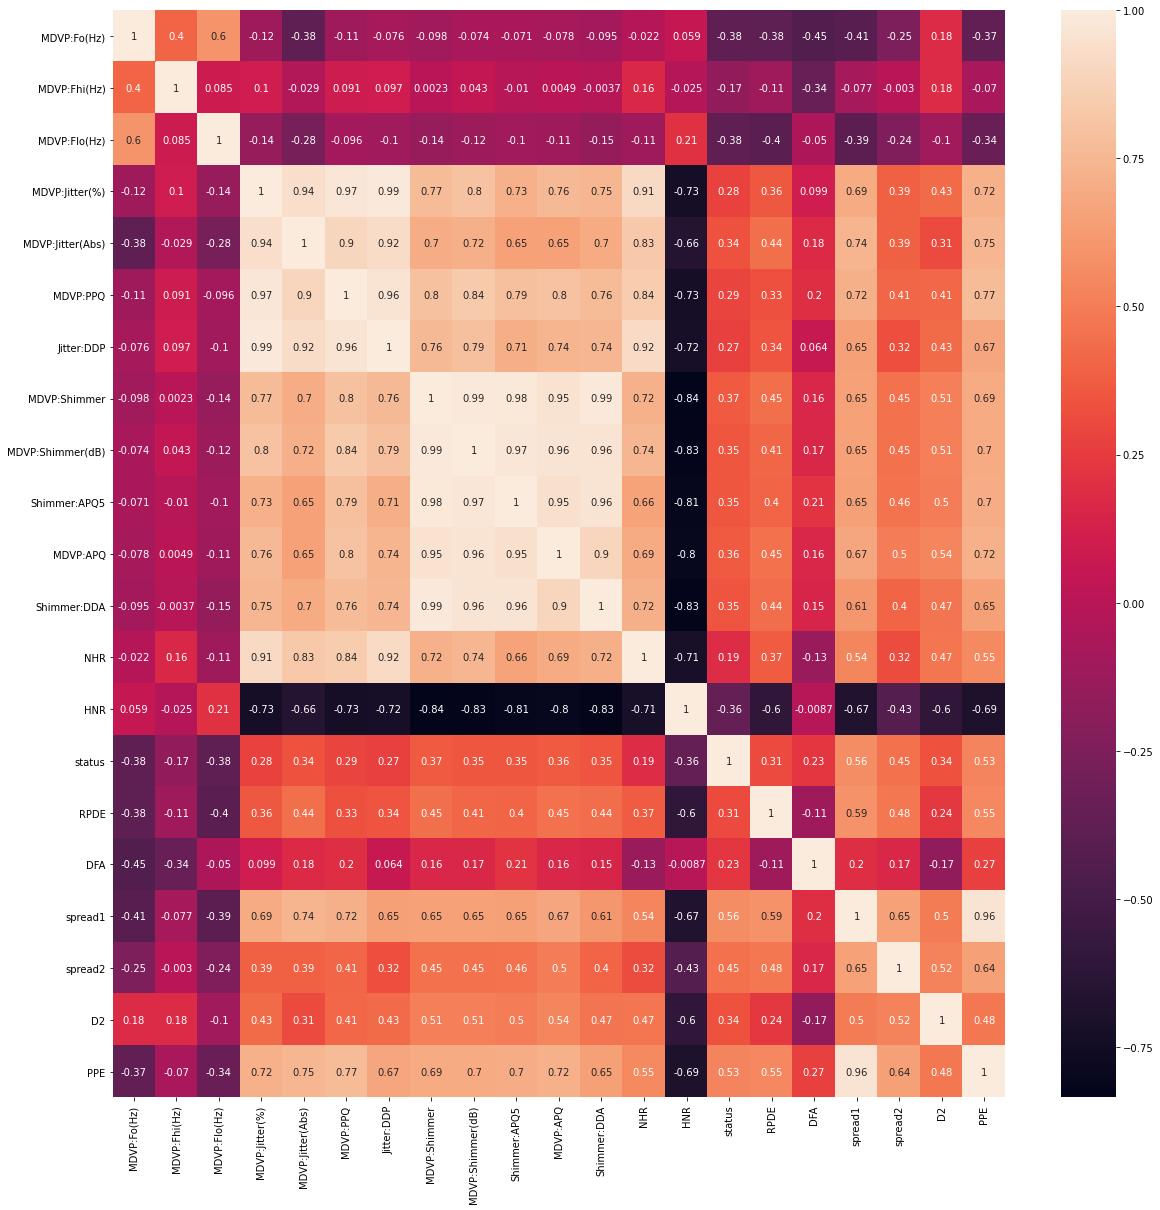

In [19]:
f, ax = plt.subplots(figsize=(20,20))
corr = data.corr()
heatmap = sns.heatmap(corr, annot=True,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

## Outliers

In order to check out the outliers that our database may have, we have computed the mean and standard deviation so that finally, we are able to extract the z-score from each value of the corresponding feature.

Depending in its values and the comparisson with a treshold of value 3, we obtain the corresponding number of outliers below.

In [16]:
column_with_outliers = []

for feature in features_to_plot:
    
    outliers = []
    
    attribute = data[feature].values
    mean_attribute = np.mean(attribute)
    std_attribute = np.std(attribute)

    print('Mean of :', feature , ' = ' , mean_attribute, 'and the Std of ',
          feature , ' = ' , std_attribute)

    #Calculation of the outliers
    for i in attribute:
        z_attribute = (i-mean_attribute)/std_attribute
        if z_attribute > 3:
            outliers.append(i)
        if z_attribute < (-3) and i != 0:
            outliers.append(i)
            
    if len(outliers) > 0:
            column_with_outliers.append(feature)
            
    print('Outlier in ', feature , ' = ' ,len(outliers))
    print('')

Mean of : MDVP:Fo(Hz)  =  154.22864102564102 and the Std of  MDVP:Fo(Hz)  =  41.283799965906525
Outlier in  MDVP:Fo(Hz)  =  0

Mean of : MDVP:Fhi(Hz)  =  197.10491794871797 and the Std of  MDVP:Fhi(Hz)  =  91.25665238831346
Outlier in  MDVP:Fhi(Hz)  =  7

Mean of : MDVP:Flo(Hz)  =  116.32463076923077 and the Std of  MDVP:Flo(Hz)  =  43.40967637841882
Outlier in  MDVP:Flo(Hz)  =  0

Mean of : MDVP:Jitter(%)  =  0.006220461538461538 and the Std of  MDVP:Jitter(%)  =  0.004835686602250747
Outlier in  MDVP:Jitter(%)  =  4

Mean of : MDVP:Jitter(Abs)  =  4.395897435897436e-05 and the Std of  MDVP:Jitter(Abs)  =  3.473250688973511e-05
Outlier in  MDVP:Jitter(Abs)  =  5

Mean of : MDVP:PPQ  =  0.003446358974358974 and the Std of  MDVP:PPQ  =  0.002751893254928691
Outlier in  MDVP:PPQ  =  4

Mean of : Jitter:DDP  =  0.009919948717948717 and the Std of  Jitter:DDP  =  0.008880485924417673
Outlier in  Jitter:DDP  =  4

Mean of : MDVP:Shimmer  =  0.0297091282051282 and the Std of  MDVP:Shimmer  =

In [17]:
print(column_with_outliers) # COlumns with presence of outliers

['MDVP:Fhi(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'D2', 'PPE']


In [18]:
from scipy.stats import zscore

z_scores = zscore(data[features_to_plot])
abs_z_scores = np.abs(z_scores)
print(abs_z_scores.shape)
print('')
print(abs_z_scores)

(195, 20)

[[0.82929965 0.43616456 0.95203729 ... 0.48047686 0.21053082 0.86888575]
 [0.77097169 0.53097409 0.05772056 ... 1.31118546 0.27507712 1.80360503]
 [0.90947638 0.7231683  0.10987483 ... 1.01768236 0.10362861 1.40266141]
 ...
 [0.49557839 0.47010361 0.96839309 ... 0.81807931 0.78033848 0.83241014]
 [1.07876114 2.19004398 0.95417967 ... 0.22906571 0.63700298 0.92610456]
 [1.45481664 0.69224632 0.88348115 ... 0.43085284 0.45480231 0.64505466]]


We keep only with the values which fullfill the condition mentioned before ( lower than 3 )

In [19]:
filtered_features = (abs_z_scores < 3).all(axis=1)
data_no_outliers = data[filtered_features]

In [20]:
print(data.shape)
print(data_no_outliers.shape)

pd.set_option('display.max_columns', None) # All columns
pd.set_option('display.max_rows', None) # All rows
data_no_outliers.head()

(195, 22)
(181, 22)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00554,0.01109,0.04374,0.426,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00696,0.01394,0.06134,0.626,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00781,0.01633,0.05233,0.482,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00698,0.01505,0.05492,0.517,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00908,0.01966,0.06425,0.584,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [21]:
print('Shape of original data : ',data[features_to_plot].shape)
print('Shape of no outliers data : ',data_no_outliers[features_to_plot].shape)

Shape of original data :  (195, 20)
Shape of no outliers data :  (181, 20)


## Comparisson before and after outliers removement

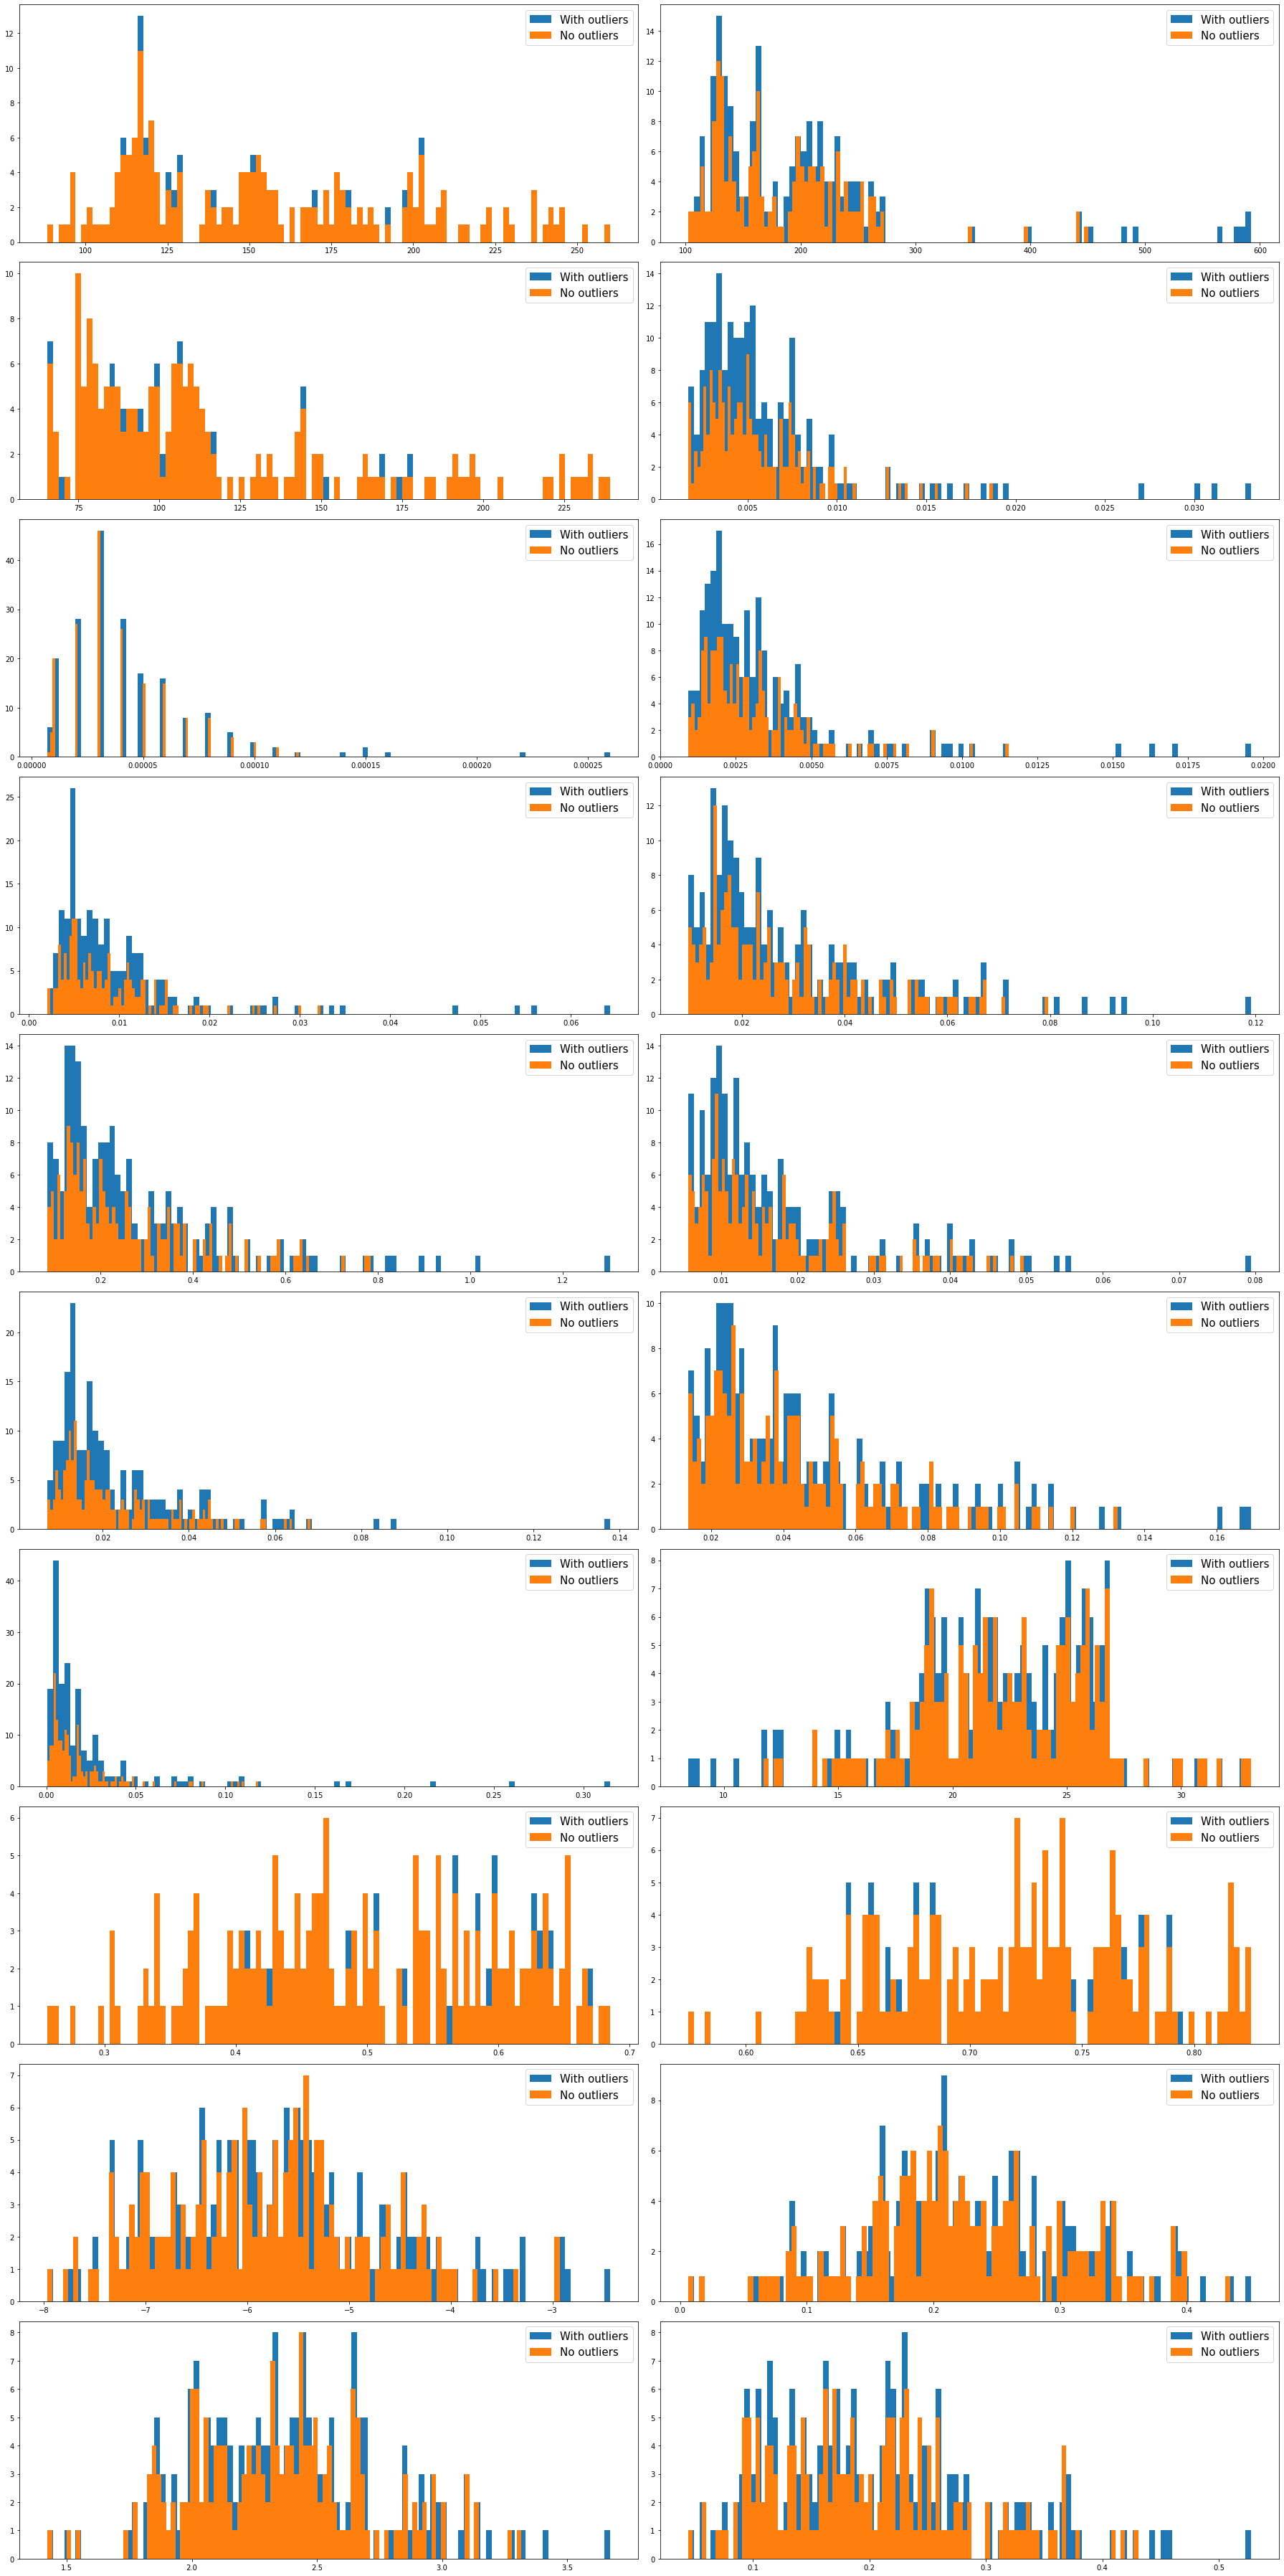

In [26]:
plt.figure(figsize = (25,50))
i = 1
for feature in features_to_plot:
    plt.subplot(10,2,i)
    plt.hist(data[feature], bins = 100 ,label = "With outliers")
    plt.hist(data_no_outliers[feature], bins = 100 ,label = "No outliers")
    plt.legend(prop={"size":15})
    i += 1
plt.tight_layout()

## Unbalanced data

Here, thanks to this visualization, we can interpret the chance of being an unbalanced data due to the high difference between values corresponding to the Parkinson status and healthy one.

Count of classes :  135 46
Shape =  (195, 22)


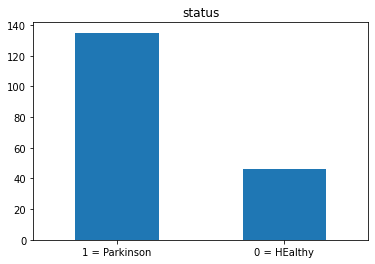

In [27]:
# Class count
count_class_0, count_class_1 = data_no_outliers['status'].value_counts()
print('Count of classes : ' , count_class_0, count_class_1)
print('Shape = ', data.shape)
#Plot the number of cases (Parkinson) and control (Healthy)
hist = data_no_outliers['status'].value_counts().plot.bar(title="status")
plt.xticks([0,1],  ['1 = Parkinson' , '0 = HEalthy'] , rotation = 0)
plt.show()

Then, with the objective of getting a more balanced dataset to work with, we decide to apply the oversampling method to the data belonging to the healthy label. 

Nevertheless, its important to take it into accunt that oversampling may create an over-fitting scenario.

### Over-sampling ~ Over-fitting
### Under-samping ~ Loss of information

In [22]:
max_size = data_no_outliers['status'].value_counts().max()
print(max_size)

135


In [23]:
lst = [data_no_outliers]
for class_index, group in data_no_outliers.groupby('status'):
    lst.append(group.sample(max_size-len(group), replace=True))
data_no_outl_balanced = pd.concat(lst)

(270, 22)


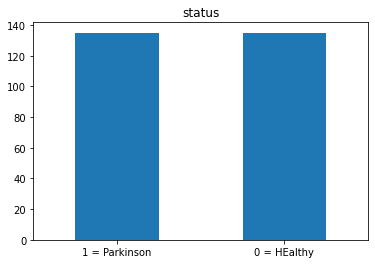

In [24]:
print(data_no_outl_balanced.shape)
hist = data_no_outl_balanced['status'].value_counts().plot.bar(title="status")
plt.xticks([0,1],  ['1 = Parkinson' , '0 = HEalthy'] , rotation = 0)
plt.show()

In [25]:
print('Nº of observations = ', data_no_outl_balanced.shape[0], ' and nº of features = ', 
      data_no_outl_balanced.shape[1] )

Nº of observations =  270  and nº of features =  22


In [26]:
data_no_outl_balanced.groupby('status').describe()

MDVP:Fo(Hz)                                                     \
             count        mean        std      min       25%      50%   
status                                                                  
0            135.0  188.185400  49.675941  110.739  125.3945  201.464   
1            135.0  144.417444  32.278033   88.333  116.7805  145.174   

                          MDVP:Fhi(Hz)                                  \
             75%      max        count        mean        std      min   
status                                                                   
0       232.8005  260.105        135.0  218.082911  67.313884  113.597   
1       168.3540  223.361        135.0  175.520230  58.990701  102.145   

                                           MDVP:Flo(Hz)              \
            25%      50%      75%      max        count        mean   
status                                                                
0       144.466  231.345  248.834  396.961        135.0  149.659444   
1       131.814  162.824  202.387  450.247        135.0  105.548926   

                                                              MDVP:Jitter(%)  \
              std     min      25%      50%       75%     max          count   
status                                                                         
0       59.806868  74.287  99.0835  117.495  205.4950  239.17          135.0   
1       31.319454  65.476  80.4670   97.527  120.8985  199.02          135.0   

                                                                          \
            mean       std      min      25%      50%       75%      max   
status                                                                     
0       0.003946  0.002280  0.00178  0.00265  0.00327  0.004590  0.01360   
1       0.005998  0.003023  0.00168  0.00391  0.00519  0.007445  0.01872   

       MDVP:Jitter(Abs)                                                  \
                  count      mean       std       min      25%      50%   
status                                                                    
0                 135.0  0.000023  0.000016  0.000007  0.00001  0.00002   
1                 135.0  0.000044  0.000024  0.000010  0.00003  0.00004   

                         MDVP:PPQ                                        \
            75%      max    count      mean      std      min       25%   
status                                                                    
0       0.00003  0.00008    135.0  0.002084  0.00101  0.00106  0.001480   
1       0.00006  0.00012    135.0  0.003368  0.00186  0.00092  0.002095   

                                  Jitter:DDP                               \
            50%      75%      max      count      mean       std      min   
status                                                                      
0       0.00182  0.00218  0.00564      135.0  0.005897  0.003325  0.00276   
1       0.00290  0.00417  0.01154      135.0  0.009447  0.005403  0.00204   

                                            MDVP:Shimmer                      \
             25%      50%      75%      max        count      mean       std   
status                                                                         
0       0.004025  0.00495  0.00616  0.01873        135.0  0.017977  0.005763   
1       0.005805  0.00810  0.01166  0.03225        135.0  0.030964  0.016019   

                                                      MDVP:Shimmer(dB)  \
            min       25%      50%       75%      max            count   
status                                                                   
0       0.00954  0.014570  0.01752  0.021805  0.04087            135.0   
1       0.01022  0.017585  0.02752  0.040040  0.07959            135.0   

                                                              Shimmer:APQ5  \
            mean       std    min    25%    50%    75%    max        count   
status                                                            

## Standarization,  normalization and splitting of data

Because in the folowing sections we are going to compare the different results, we choose to compute the maximun and minimun normalization and standarization to the X sets.

In [27]:
# Splitting
from sklearn.model_selection import train_test_split

X = data_no_outl_balanced[features_to_plot]
Y = data_no_outl_balanced['status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [28]:
print('shapes of training sets : ', X_train.shape, Y_train.shape)
print('shapes of test sets : ', X_test.shape, Y_test.shape)

shapes of training sets :  (202, 20) (202,)
shapes of test sets :  (68, 20) (68,)


In [29]:
from sklearn import preprocessing

max_min = preprocessing.MinMaxScaler().fit(X_train)
X_train_norm_scaler = max_min.transform(X_train)
X_test_norm_scaler = max_min.transform(X_test)

std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm_std_scaler = std_scaler.transform(X_train)
X_test_norm_std_scaler = std_scaler.transform(X_test)

- - -

# 4.- Supervised or unsupervised learning

## Classification, supervised methods

#### Non parametric

In order to perform a supervised machine learning algorithm, we finally make a choice using K-nn, decision trees and random forest as our classifier algorithms.

In [30]:
import scipy.stats as ss
import seaborn as sbn
import sklearn
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def measures_from_conf_matrix(confusion_matrix):
    TP = confusion_matrix[0][0]
    FN = confusion_matrix[0][1]
    FP = confusion_matrix[1][0]
    TN = confusion_matrix[1][1]
    print('TP = ', TP)
    print('FN = ', FN)
    print('FP = ', FP)
    print('TN = ', TN)
    sensitivity = TP/(TP+FN)
    print('Sensitivity = ',sensitivity)
    specifity = TN/(TN+FP)
    print('Specifity = ',specifity)
    return 

## Hyper parameters search

### K-NN

In [38]:
k_values = range(1,30,2)
weights = ['uniform', 'distance']

param_grid = {
    'n_neighbors': k_values,
    'weights': weights
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid = param_grid,
    cv = 4,
    scoring = 'accuracy'
    )
grid.fit(X_train_norm_scaler, Y_train)

grid.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

K value =  1 Score [0.92647059 0.92537313 0.91044776]
K value =  3 Score [0.86764706 0.94029851 0.89552239]
K value =  5 Score [0.83823529 0.95522388 0.92537313]
K value =  7 Score [0.80882353 0.91044776 0.94029851]
K value =  9 Score [0.82352941 0.91044776 0.86567164]
K value =  11 Score [0.80882353 0.89552239 0.86567164]
K value =  13 Score [0.80882353 0.85074627 0.88059701]
K value =  15 Score [0.77941176 0.82089552 0.8358209 ]
K value =  17 Score [0.77941176 0.79104478 0.7761194 ]
K value =  19 Score [0.73529412 0.76119403 0.79104478]
K value =  21 Score [0.75      0.7761194 0.7761194]
K value =  23 Score [0.73529412 0.7761194  0.7761194 ]
K value =  25 Score [0.73529412 0.7761194  0.7761194 ]
K value =  27 Score [0.73529412 0.74626866 0.76119403]
K value =  29 Score [0.73529412 0.76119403 0.76119403]


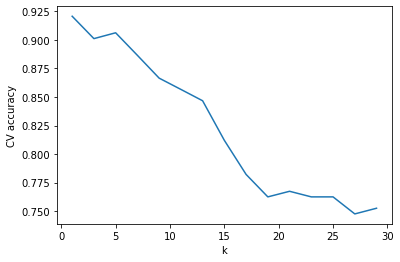

The best k value is =  1


In [191]:
#### Max-min

k_values = range(1,30,2)

cv_k_scores=[]
for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k, weights = 'uniform')
    
    scores= cross_val_score(kNN, X_train_norm_scaler, Y_train, cv=3, scoring='accuracy')
    print('K value = ', k,'Score',scores)
    cv_k_scores.append(scores.mean())
    
plt.plot(k_values, cv_k_scores)
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.show()

# Select the maximum because we are considering accuracuy
print('The best k value is = ',np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

In [31]:
kNN = KNeighborsClassifier(n_neighbors= 5, weights = 'uniform')
model = kNN.fit(X_train_norm_scaler,Y_train)
y_pred_train = model.predict(X_train_norm_scaler)
y_pred = model.predict(X_test_norm_scaler)
print('Max-min norm')
print('Train accuracy = ', accuracy_score(Y_train, y_pred_train))
print('Test accuracy = ', accuracy_score(Y_test, y_pred))
print('')
measures_from_conf_matrix(confusion_matrix(Y_test, y_pred))

Max-min norm
Train accuracy =  0.9603960396039604
Test accuracy =  0.9558823529411765

TP =  28
FN =  0
FP =  3
TN =  37
Sensitivity =  1.0
Specifity =  0.925


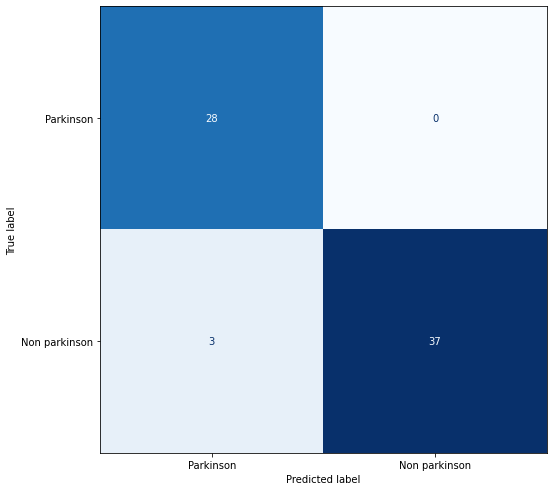

In [32]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(kNN, X_test_norm_scaler, Y_test, 
                     display_labels=['Parkinson', 'Non parkinson'],
                                 cmap=plt.cm.Blues,
                     ax=ax)  
fig.delaxes(fig.axes[1])
plt.show()  

In [197]:
k_values = range(1,30,2)
weights = ['uniform', 'distance']

param_grid = {
    'n_neighbors': k_values,
    'weights': weights
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid = param_grid,
    cv = 4,
    scoring = 'accuracy'
    )
grid.fit(X_train_norm_std_scaler, Y_train)

grid.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

K value =  1 Score [0.92647059 0.95522388 0.95522388]
K value =  3 Score [0.86764706 0.94029851 0.94029851]
K value =  5 Score [0.85294118 0.95522388 0.95522388]
K value =  7 Score [0.80882353 0.89552239 0.97014925]
K value =  9 Score [0.79411765 0.88059701 0.97014925]
K value =  11 Score [0.79411765 0.89552239 0.95522388]
K value =  13 Score [0.79411765 0.91044776 0.95522388]
K value =  15 Score [0.80882353 0.85074627 0.89552239]
K value =  17 Score [0.80882353 0.80597015 0.85074627]
K value =  19 Score [0.76470588 0.79104478 0.85074627]
K value =  21 Score [0.75      0.7761194 0.8358209]
K value =  23 Score [0.76470588 0.7761194  0.8358209 ]
K value =  25 Score [0.72058824 0.76119403 0.80597015]
K value =  27 Score [0.73529412 0.73134328 0.82089552]
K value =  29 Score [0.72058824 0.73134328 0.79104478]


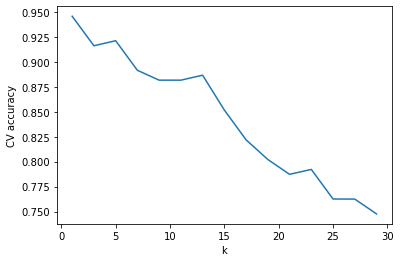

The best k value is =  1


In [193]:
#### Std

k_values = range(1,30,2)

cv_k_scores=[]
for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k, weights = 'uniform')
    
    scores= cross_val_score(kNN, X_train_norm_std_scaler, Y_train, cv=3, scoring='accuracy')
    print('K value = ', k,'Score',scores)
    cv_k_scores.append(scores.mean())
    
plt.plot(k_values, cv_k_scores)
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.show()

# Select the maximum because we are considering accuracuy
print('The best k value is = ',np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

In [33]:
kNN = KNeighborsClassifier(n_neighbors= 5, weights = 'uniform')
model = kNN.fit(X_train_norm_std_scaler,Y_train)
y_pred_train = model.predict(X_train_norm_std_scaler)
y_pred = model.predict(X_test_norm_std_scaler)
print('Standarization')
print('Train accuracy = ', accuracy_score(Y_train, y_pred_train))
print('Test accuracy = ', accuracy_score(Y_test, y_pred))
print('')
measures_from_conf_matrix(confusion_matrix(Y_test, y_pred))

Standarization
Train accuracy =  0.9653465346534653
Test accuracy =  0.9264705882352942

TP =  27
FN =  1
FP =  4
TN =  36
Sensitivity =  0.9642857142857143
Specifity =  0.9


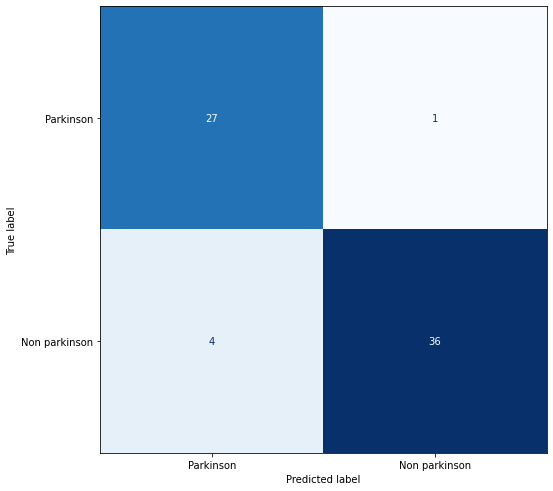

In [34]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(kNN, X_test_norm_std_scaler, Y_test, 
                     display_labels=['Parkinson', 'Non parkinson'],
                                 cmap=plt.cm.Blues,
                     ax=ax)  
fig.delaxes(fig.axes[1])
plt.show()  

## Decision tree

In [200]:
#### Max-min

max_depth = range(1,15)
min_samples_leaf = [1,5,10,15,50,100]
min_samples_split  = [25,50,75,100,125,150]

param_grid = {
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split' : min_samples_split
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state = 1),
    param_grid = param_grid,
    cv = 4,
    scoring = 'accuracy'
    )
grid.fit(X_train_norm_scaler, Y_train)

grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 15, 'min_samples_split': 25}

In [35]:
DT = DecisionTreeClassifier(max_depth= 3, min_samples_leaf= 15, min_samples_split = 25,
                            random_state = 1)
model = DT.fit(X_train_norm_scaler,Y_train)
y_pred_train = model.predict(X_train_norm_scaler)
y_pred = model.predict(X_test_norm_scaler)
print('Max-min norm')
print('Train accuracy = ', accuracy_score(Y_train, y_pred_train))
print('Test accuracy = ', accuracy_score(Y_test, y_pred))
print('')
measures_from_conf_matrix(confusion_matrix(Y_test, y_pred))

Max-min norm
Train accuracy =  0.900990099009901
Test accuracy =  0.9264705882352942

TP =  26
FN =  2
FP =  3
TN =  37
Sensitivity =  0.9285714285714286
Specifity =  0.925


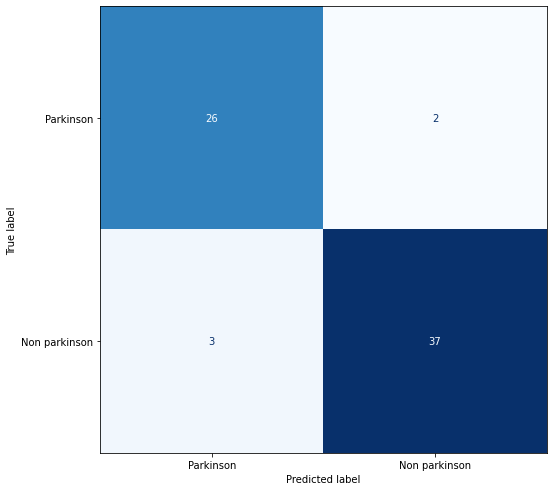

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(DT, X_test_norm_scaler, Y_test, 
                     display_labels=['Parkinson', 'Non parkinson'],
                                 cmap=plt.cm.Blues,
                     ax=ax)  
fig.delaxes(fig.axes[1])
plt.show()  

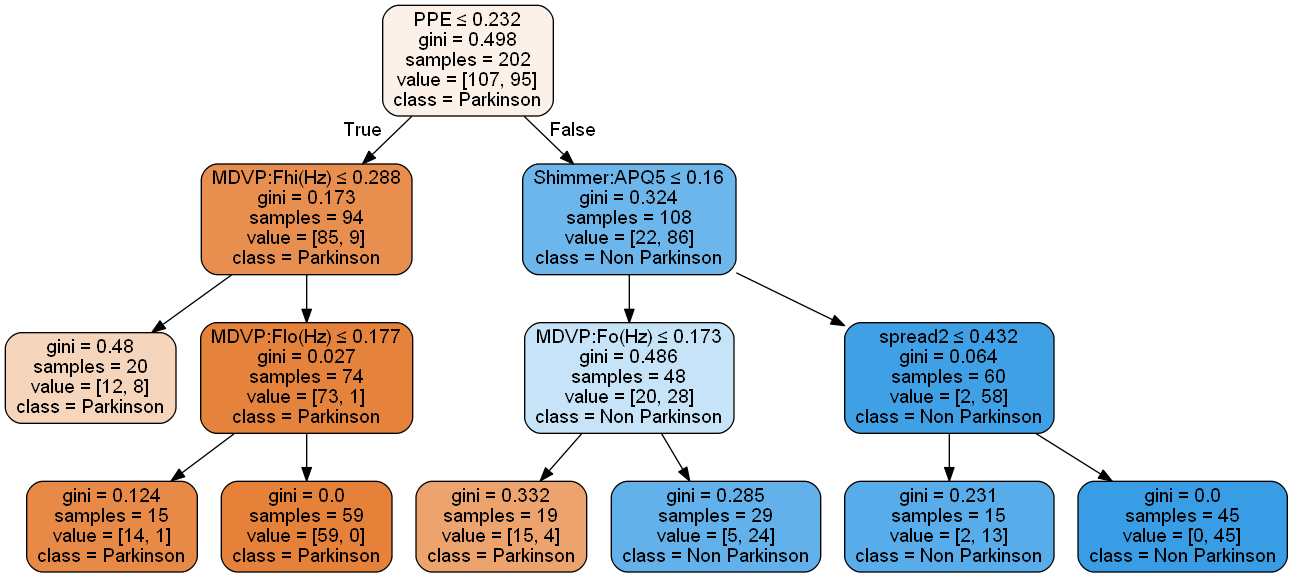

In [37]:
import graphviz
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(DT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features_to_plot,
                class_names=['Parkinson','Non Parkinson'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Parkinson.png')
Image(graph.create_png())

In [204]:
#### Std

max_depth = range(1,15)
min_samples_leaf = [1,5,10,15,50,100]
min_samples_split  = [25,50,75,100,125,150]

param_grid = {
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split' : min_samples_split
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state = 1),
    param_grid = param_grid,
    cv = 4,
    scoring = 'accuracy'
    )
grid.fit(X_train_norm_std_scaler, Y_train)

grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 15, 'min_samples_split': 25}

In [38]:
DT = DecisionTreeClassifier(max_depth= 3, min_samples_leaf= 15, min_samples_split = 25,
                            random_state = 1)
model = DT.fit(X_train_norm_std_scaler,Y_train)
y_pred_train = model.predict(X_train_norm_std_scaler)
y_pred = model.predict(X_test_norm_std_scaler)
print('Standarization')
print('Train accuracy = ', accuracy_score(Y_train, y_pred_train))
print('Test accuracy = ', accuracy_score(Y_test, y_pred))
print('')
measures_from_conf_matrix(confusion_matrix(Y_test, y_pred))

Standarization
Train accuracy =  0.900990099009901
Test accuracy =  0.9264705882352942

TP =  26
FN =  2
FP =  3
TN =  37
Sensitivity =  0.9285714285714286
Specifity =  0.925


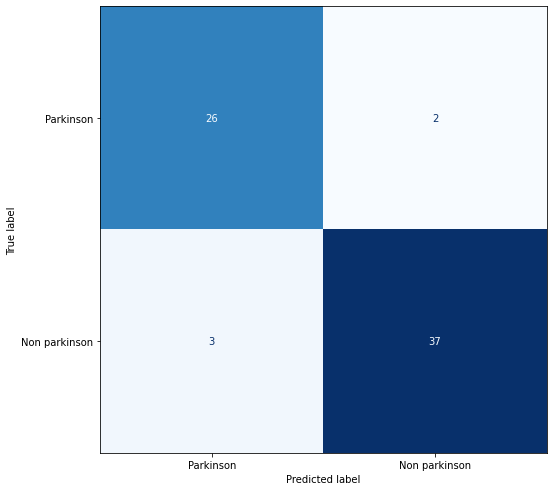

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(DT, X_test_norm_std_scaler, Y_test, 
                     display_labels=['Parkinson', 'Non parkinson'],
                                 cmap=plt.cm.Blues,
                     ax=ax)  
fig.delaxes(fig.axes[1])
plt.show()  

## Random forest

In [216]:
#### Random forest
## Max-min

n_estimators = [25,50,75,100,125,150]
max_depth = range(1,15)
min_samples_leaf = [1,5,10,15,50,100]
min_samples_split  = [25,50,75,100,125,150]

param_grid = {
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split' : min_samples_split,
    'n_estimators' : n_estimators
}

grid = GridSearchCV(
    RandomForestClassifier(random_state = 1),
    param_grid = param_grid,
    cv = 4,
    scoring = 'accuracy'
    )
grid.fit(X_train_norm_scaler, Y_train)

grid.best_params_

{'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 25,
 'n_estimators': 25}

In [40]:
RFC = RandomForestClassifier(max_depth= 4, min_samples_leaf= 1, min_samples_split = 25,
                             n_estimators = 25,  random_state = 1)
model = RFC.fit(X_train_norm_scaler,Y_train)
y_pred_train = model.predict(X_train_norm_scaler)
y_pred = model.predict(X_test_norm_scaler)
print('Max-min norm')
print('Train accuracy = ', accuracy_score(Y_train, y_pred_train))
print('Test accuracy = ', accuracy_score(Y_test, y_pred))
print('')
measures_from_conf_matrix(confusion_matrix(Y_test, y_pred))

Max-min norm
Train accuracy =  0.9653465346534653
Test accuracy =  0.9558823529411765

TP =  27
FN =  1
FP =  2
TN =  38
Sensitivity =  0.9642857142857143
Specifity =  0.95


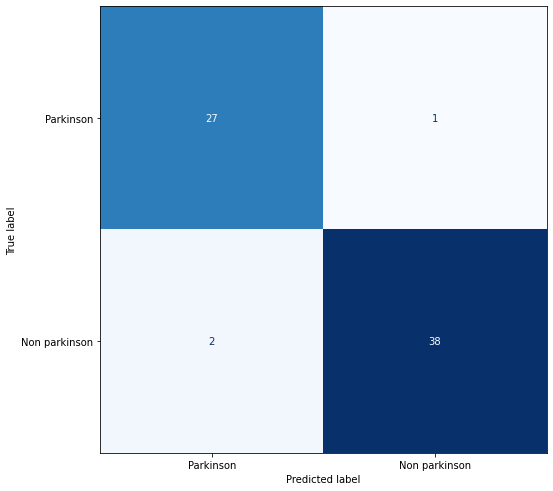

In [41]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(RFC, X_test_norm_scaler, Y_test, 
                     display_labels=['Parkinson', 'Non parkinson'],
                                 cmap=plt.cm.Blues,
                     ax=ax)  
fig.delaxes(fig.axes[1])
plt.show()  

In [42]:
#### Random forest
## Std

n_estimators = [25,50,75,100,125,150]
max_depth = range(1,15)
min_samples_leaf = [1,5,10,15,50,100]
min_samples_split  = [25,50,75,100,125,150]

param_grid = {
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split' : min_samples_split,
    'n_estimators' : n_estimators
}

grid = GridSearchCV(
    RandomForestClassifier(random_state = 1),
    param_grid = param_grid,
    cv = 4,
    scoring = 'accuracy'
    )
grid.fit(X_train_norm_std_scaler, Y_train)

grid.best_params_

{'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 25,
 'n_estimators': 50}

In [42]:
RFC = RandomForestClassifier(max_depth= 4, min_samples_leaf= 5, min_samples_split = 25,
                             n_estimators = 50,  random_state = 1)
model = RFC.fit(X_train_norm_std_scaler,Y_train)
y_pred_train = model.predict(X_train_norm_std_scaler)
y_pred = model.predict(X_test_norm_std_scaler)
print('Standarization')
print('Train accuracy = ', accuracy_score(Y_train, y_pred_train))
print('Test accuracy = ', accuracy_score(Y_test, y_pred))
print('')
measures_from_conf_matrix(confusion_matrix(Y_test, y_pred))

Standarization
Train accuracy =  0.9504950495049505
Test accuracy =  0.9264705882352942

TP =  26
FN =  2
FP =  3
TN =  37
Sensitivity =  0.9285714285714286
Specifity =  0.925


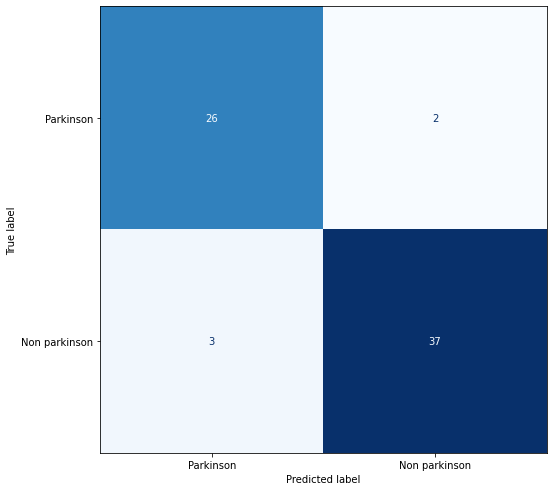

In [43]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(RFC, X_test_norm_std_scaler, Y_test, 
                     display_labels=['Parkinson', 'Non parkinson'],
                                 cmap=plt.cm.Blues,
                     ax=ax)  
fig.delaxes(fig.axes[1])
plt.show()  

## Tables

KNN-COMPARATIVE TABLE:

| KNN model | Train accuracy | Test accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|---|
|Max-Min norm | 0.9604 | 0.9559 | 28 | 0 | 3 | 37 | 1.0 | 0.925 |
|Std norm | 0.9653 | 0.9265 | 27 | 1 | 4 | 36 | 0.9643 | 0.9 |

DECISION TREES-COMPARATIVE TABLE:

| Decision Tree model | Train accuracy | Test accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|---|
|Max-Min norm | 0.9009 | 0.9265 | 26 | 2 | 3 | 37 | 0.9286 | 0.925 |
|Std norm | 0.9009 | 0.9265 | 26 | 2 | 3 | 37 | 0.9286 | 0.925 |

Random Forest-COMPARATIVE TABLE:

| Random Forest model | Train accuracy | Test accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|---|
|Max-Min norm | 0.9653 | 0.9559 | 27 | 1 | 2 | 38 | 0.9653 | 0.95 |
|Std norm | 0.9505 | 0.9265 | 26 | 2 | 3 | 37 | 0.9286 | 0.925 |

After getting the best parameters possible by performing gridsearch to each of the machine learning algorithms, we perform the computations to each of the models with the x set composed by all features and y set.

The algorithms which provides the best accuracy for our test sets are the K-nn and Random forest. The difference between them are the sensitivity, higher in K-nn, and the specifity which is slightly different in the random forest.

Both perform better using the maximun and minimun normalization.

With respect to the decision trees, both normalization and standarization provides equal results, but lower in performance with respect to the othre two methods used.

- - -

# 5.- Feature selection and feature extraction

## Measure techniques

As a first step to obtain the importance from each feature of the dataset, we will perform a comparison using as measure technique the mutual information. It will measure the statistical dependency from each of the characteristics, using non parametric techniques.

#### MI

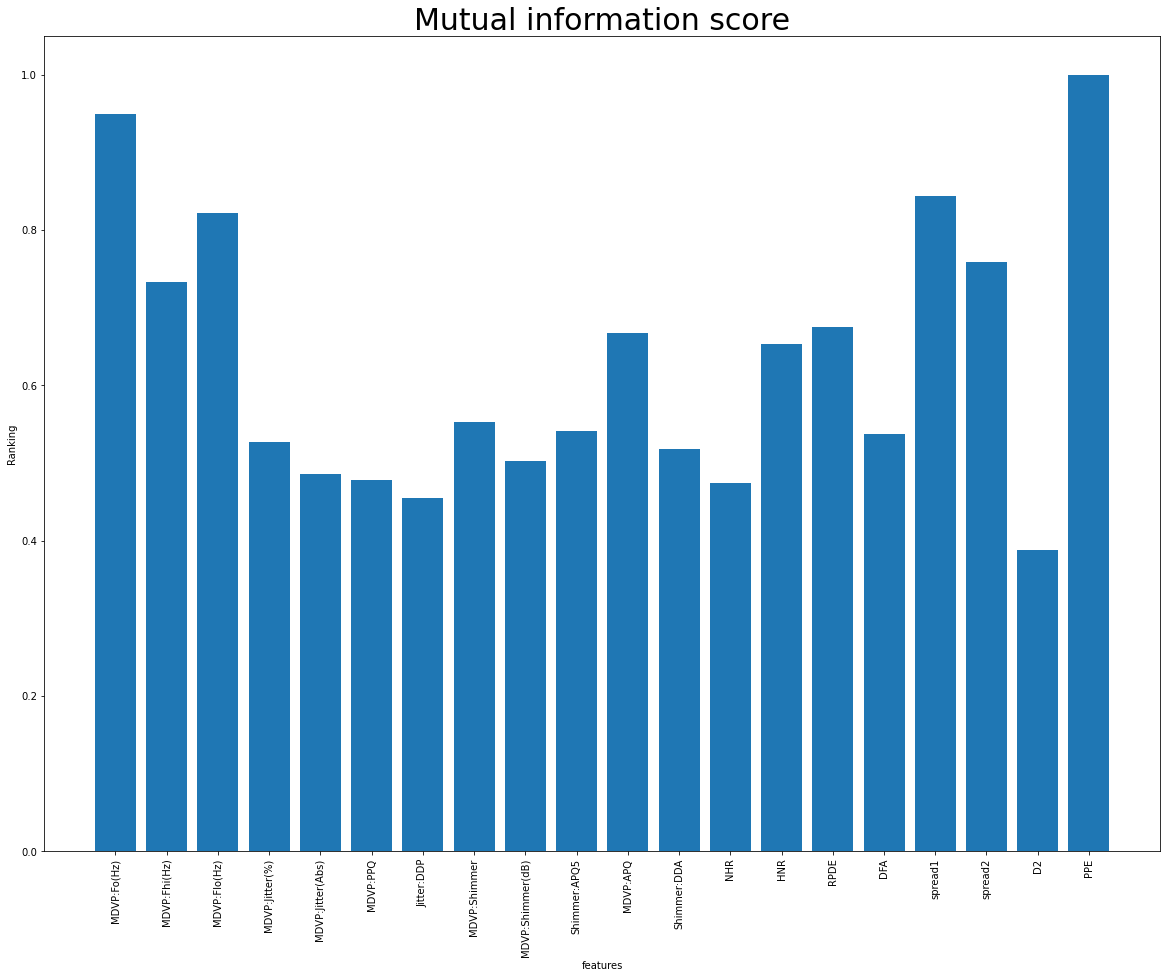

In [44]:
from sklearn.feature_selection import mutual_info_classif

X = X_train_norm_scaler
# columns = features_to_plot

Y = Y_train

X_all = X
mi = mutual_info_classif(X_all,Y)
mi /= np.max(mi)

plt.figure(figsize=(20, 15))

plt.bar(range(X_all.shape[1]), mi,  align="center")
plt.xticks(range(0,X.shape[1]) , features_to_plot, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score', fontsize = 30)

plt.show()

In [45]:
list_mi_all = list(mi)
list_mi_all_ordered = sorted(list_mi_all, reverse=True)
for i in range(0,len(list_mi_all_ordered)):
    max_value = list_mi_all_ordered[i]
    max_index = list_mi_all.index(max_value)
    print('Columns with the',  i, 'º value :' , features_to_plot[max_index], '... value = ', 
          list_mi_all_ordered[i] )

Columns with the 0 º value : PPE ... value =  1.0
Columns with the 1 º value : MDVP:Fo(Hz) ... value =  0.949976216841974
Columns with the 2 º value : spread1 ... value =  0.8445340927007488
Columns with the 3 º value : MDVP:Flo(Hz) ... value =  0.8215378514309368
Columns with the 4 º value : spread2 ... value =  0.7584728476962546
Columns with the 5 º value : MDVP:Fhi(Hz) ... value =  0.7327329695222682
Columns with the 6 º value : RPDE ... value =  0.6750612693859216
Columns with the 7 º value : MDVP:APQ ... value =  0.6669501007286038
Columns with the 8 º value : HNR ... value =  0.6534468151401577
Columns with the 9 º value : MDVP:Shimmer ... value =  0.5523991407439353
Columns with the 10 º value : Shimmer:APQ5 ... value =  0.5418234319965433
Columns with the 11 º value : DFA ... value =  0.5379734372115061
Columns with the 12 º value : MDVP:Jitter(%) ... value =  0.5269024478619927
Columns with the 13 º value : Shimmer:DDA ... value =  0.5177442503818378
Columns with the 14 º val

* We get as a result 2 features with importance greater than 0.9 :
    * MDVP:Fo(Hz)
    * PPE

## Feature importance

Now we will obtain the best features taking advantage from two of the methods used before as they can perform this selection thanks to the implementation of it inside of its architecture.

### Embedded methods

#### Decission trees and Random forest

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

DT = DecisionTreeClassifier(max_depth= 3, min_samples_leaf= 15, min_samples_split = 25,
                            random_state = 1)

X = X_train_norm_scaler
# columns = features_to_plot
Y = Y_train

DT_model = DT.fit(X, Y)

In [47]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(max_depth= 4, min_samples_leaf= 1, min_samples_split = 25,
                             n_estimators = 25,  random_state = 1)

X = X_train_norm_scaler
# columns = features_to_plot
Y = Y_train

RF_model = RFC.fit(X, Y)

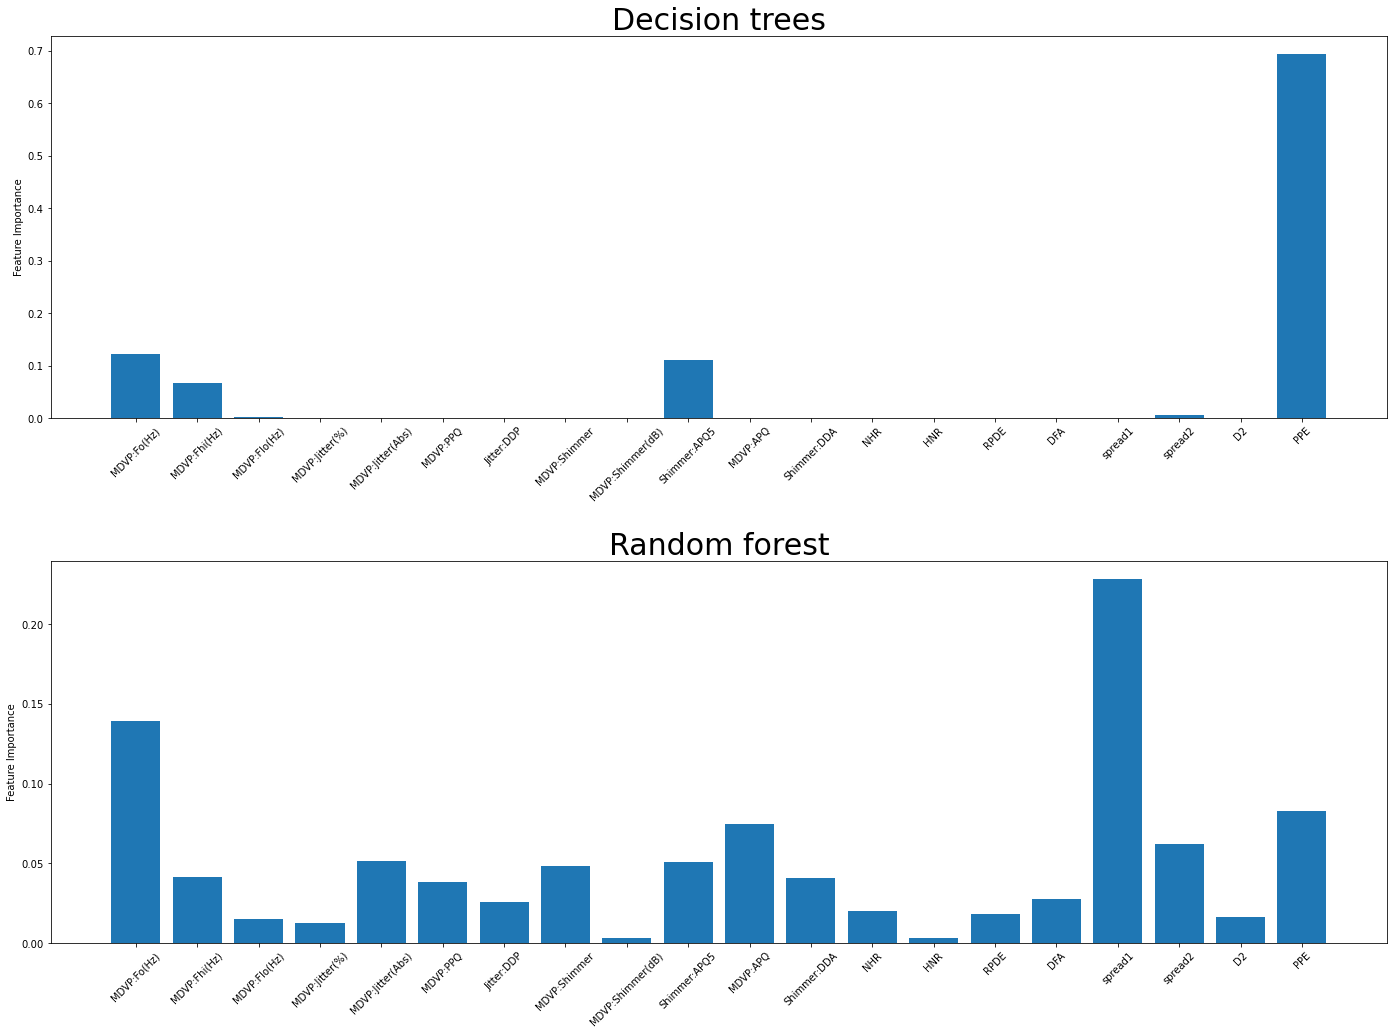

In [48]:
plt.figure(figsize=(20, 15))
plt.subplot(2,1,1)
plt.bar(range(X.shape[1]), DT_model.feature_importances_,  align="center")
plt.xticks(range(0,X.shape[1]) , features_to_plot , rotation = 45)
plt.title('Decision trees', fontsize = 30)
plt.ylabel('Feature Importance')

plt.subplot(2,1,2)
plt.bar(range(X.shape[1]), RF_model.feature_importances_,  align="center")
plt.xticks(range(0,X.shape[1]) , features_to_plot , rotation = 45)
plt.title('Random forest', fontsize = 30)
plt.ylabel('Feature Importance')

plt.tight_layout(pad=3.0)
plt.show()

In [49]:
sel = SelectFromModel(DT_model , threshold=0.10).fit(X,Y)
print(data_no_outl_balanced[features_to_plot].columns[sel.get_support()])
sel = SelectFromModel(RF_model , threshold=0.10).fit(X,Y)
print(data_no_outl_balanced[features_to_plot].columns[sel.get_support()])

Index(['MDVP:Fo(Hz)', 'Shimmer:APQ5', 'PPE'], dtype='object')
Index(['MDVP:Fo(Hz)', 'spread1'], dtype='object')


* We get as a result 2 features with importance greater than 0.1 :
    * DT:
        * MDVP:Fo(Hz)
        * PPE
        * Shimmer:APQ5
  
    * RF:
        * MDVP:Fo(Hz)
        * spread1

### By order importance

In [50]:
importances = DT_model.feature_importances_
indices = np.argsort(importances)[::-1]
print('Decision trees')
print('Columns by orders importance: ', 
      [i for i in data_no_outl_balanced[features_to_plot].columns[indices]][0:6])

print('')
importances = RF_model.feature_importances_
indices = np.argsort(importances)[::-1]
print('Random forest')
print('Columns by orders importance: ', 
      [i for i in data_no_outl_balanced[features_to_plot].columns[indices]][0:6])


Decision trees
Columns by orders importance:  ['PPE', 'MDVP:Fo(Hz)', 'Shimmer:APQ5', 'MDVP:Fhi(Hz)', 'spread2', 'MDVP:Flo(Hz)']

Random forest
Columns by orders importance:  ['spread1', 'MDVP:Fo(Hz)', 'PPE', 'MDVP:APQ', 'spread2', 'MDVP:Jitter(Abs)']


Now, instead of using the algorithm itself, we will compute all three models and at the end, perform the score from the results using cross validation.

## Wrapper methods 

#### K-Nn, Decision tree and Random forest

In [51]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = data_no_outl_balanced[features_to_plot]
Y = data_no_outl_balanced['status']

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values)

max_min = preprocessing.MinMaxScaler().fit(X_train)
X_train_norm_scaler = max_min.transform(X_train)
X_test_norm_scaler = max_min.transform(X_test)

In [52]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors= 5, weights = 'uniform')


N, D = X_train_norm_scaler.shape

kf = KFold(n_splits=3, shuffle = True, random_state=0) # CV 3 folds

cv_error = []
cv_std = []
number_features = []

for n in range(D,0,-1): # -2 to reduce by half the time
        
    error_i = []
    
    for train, validation in kf.split(X_train_norm_scaler):
        
        # option 1: mutual_info_regression
        mi = mutual_info_classif(X_train_norm_scaler[train], Y_train[train])
        mi /= np.max(mi) 
        ranking = np.argsort(mi)[::-1] 
        
        #-- selection
        indices = np.argsort(ranking)[::-1] 
        selected = indices[0:(D-n+1)] 
        Xs = X_train_norm_scaler[:,selected]
        
        #-- fit on selected features
        kNN.fit(Xs[train],Y_train[train])
        error = 1.0 - kNN.score(Xs[validation],Y_train[validation])
        error_i.append(error) 
        
    
    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))
    number_features.append(n)
    
    print('# features ' + str(D-n+1) + ' error ' + str(np.mean(error_i)) + ' +/- ' + str(np.std(error_i)))
    print('Indexes of columns selected : ', selected)
    print('')

# features 1 error 0.19278606965174128 +/- 0.06334742078729774
Indexes of columns selected :  [0]

# features 2 error 0.12357330992098332 +/- 0.029627732586295096
Indexes of columns selected :  [ 0 19]

# features 3 error 0.13352355867720223 +/- 0.03150913993741038
Indexes of columns selected :  [ 0 19  2]

# features 4 error 0.10864793678665496 +/- 0.048362076322724795
Indexes of columns selected :  [ 0 19  2  3]

# features 5 error 0.1286947614866842 +/- 0.018461887339050118
Indexes of columns selected :  [ 0 19  2  3 18]

# features 6 error 0.11376938835235588 +/- 0.027689689771594535
Indexes of columns selected :  [ 0 19  2  3 18 17]

# features 7 error 0.11362306116476444 +/- 0.034041283437280356
Indexes of columns selected :  [ 0 19  2  3 18 17  5]

# features 8 error 0.10864793678665496 +/- 0.038050274288752975
Indexes of columns selected :  [ 0 19  2  3 18 17  6 11]

# features 9 error 0.1183786947614867 +/- 0.06306311340934535
Indexes of columns selected :  [ 0 19  2  3 18 17 

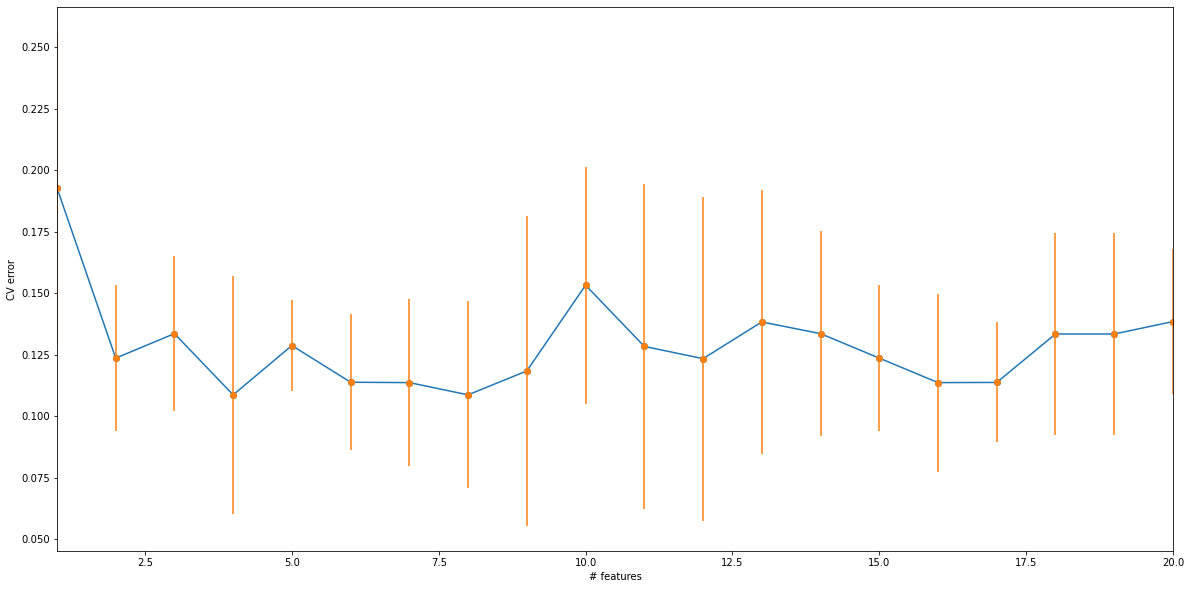

In [53]:
number_features = number_features[::-1]

plt.figure(figsize=(20, 10))
plt.plot(number_features,cv_error,'-o')
plt.errorbar(number_features, cv_error, yerr=cv_std, fmt='o')
plt.xlabel('# features')
plt.xlim(1,20)
plt.ylabel('CV error')

plt.show()

## 3 features K-NN 

### [0 ,19  ,2]

In [58]:
print('Features selected :')
print('')
for i in [0 ,19 ,2]: 
    print(X.columns[i])

Features selected :

MDVP:Fo(Hz)
PPE
MDVP:Flo(Hz)


- - -

In [61]:
DT = DecisionTreeClassifier(max_depth= 3, min_samples_leaf= 15, min_samples_split = 25,
                            random_state = 1)


N, D = X_train_norm_scaler.shape

kf = KFold(n_splits=3, shuffle = True, random_state=0)

cv_error = []
cv_std = []
number_features = []

for n in range(D,0,-1): # -2 to reduce by half the time
        
    error_i = []
    
    for train, validation in kf.split(X_train_norm_scaler):
        
        # option 1: mutual_info_regression
        mi = mutual_info_classif(X_train_norm_scaler[train], Y_train[train])
        mi /= np.max(mi) 
        ranking = np.argsort(mi)[::-1] 
        
        #-- selection
        indices = np.argsort(ranking)[::-1] 
        selected = indices[0:(D-n+1)] 
        Xs = X_train_norm_scaler[:,selected]
        
        #-- fit on selected features
        DT.fit(Xs[train],Y_train[train])
        error = 1.0 - DT.score(Xs[validation],Y_train[validation])
        error_i.append(error) 
        
    
    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))
    number_features.append(n)
    
    print('# features ' + str(D-n+1) + ' error ' + str(np.mean(error_i)) + ' +/- ' + str(np.std(error_i)))
    print('Indexes of columns selected : ', selected)
    print('')

# features 1 error 0.24195200468247002 +/- 0.09216109819021118
Indexes of columns selected :  [0]

# features 2 error 0.2271729587357331 +/- 0.07876895939460454
Indexes of columns selected :  [ 0 19]

# features 3 error 0.23214808311384252 +/- 0.07501498629795832
Indexes of columns selected :  [ 0 19  2]

# features 4 error 0.23214808311384252 +/- 0.07501498629795832
Indexes of columns selected :  [ 0 19  2  3]

# features 5 error 0.20749195200468243 +/- 0.06245411673598845
Indexes of columns selected :  [ 0 19  2  3 18]

# features 6 error 0.19234708808896694 +/- 0.10599872183661993
Indexes of columns selected :  [ 0 19  2  3 18 17]

# features 7 error 0.19234708808896694 +/- 0.10599872183661993
Indexes of columns selected :  [ 0 19  2  3 18 17  5]

# features 8 error 0.18737196371085751 +/- 0.10823133730815893
Indexes of columns selected :  [ 0 19  2  3 18 17  6 12]

# features 9 error 0.19234708808896694 +/- 0.10599872183661993
Indexes of columns selected :  [ 0 19  2  3 18 17  5 12

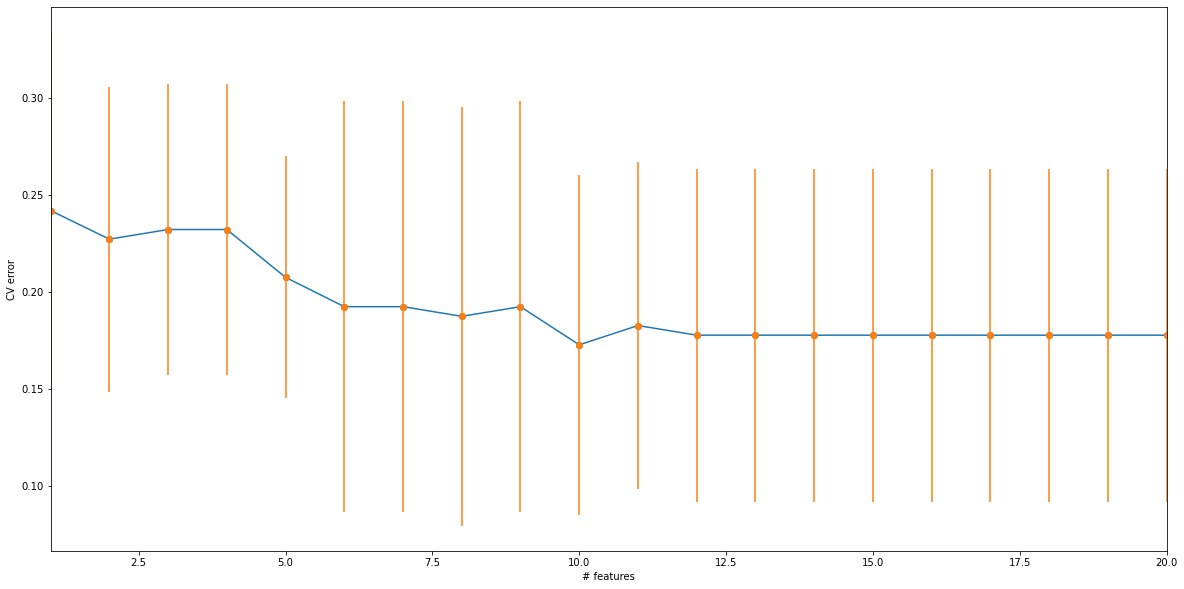

In [62]:
number_features = number_features[::-1]

plt.figure(figsize=(20, 10))
plt.plot(number_features,cv_error,'-o')
plt.errorbar(number_features, cv_error, yerr=cv_std, fmt='o')
plt.xlabel('# features')
plt.xlim(1,20)
plt.ylabel('CV error')

plt.show()

## 10 features Decision trees

### [ 0 ,19  ,2  ,3 ,18 ,17  ,6 ,12 ,14 ,15]

In [63]:
print('Features selected :')
print('')
for i in [ 0 ,19 ,2 ,3 ,18 ,17 ,6 ,12 ,14 ,15]:
    print(X.columns[i])

Features selected :

MDVP:Fo(Hz)
PPE
MDVP:Flo(Hz)
MDVP:Jitter(%)
D2
spread2
Jitter:DDP
NHR
RPDE
DFA


- - -

In [64]:
RFC = RandomForestClassifier(max_depth= 4, min_samples_leaf= 1, min_samples_split = 25,
                             n_estimators = 25,  random_state = 1)


N, D = X_train_norm_scaler.shape

kf = KFold(n_splits=3, shuffle = True, random_state=0)

cv_error = []
cv_std = []
number_features = []

for n in range(D,0,-1): # -2 to reduce by half the time
        
    error_i = []
    
    for train, validation in kf.split(X_train_norm_scaler):
        
        # option 1: mutual_info_regression
        mi = mutual_info_classif(X_train_norm_scaler[train], Y_train[train])
        mi /= np.max(mi) 
        ranking = np.argsort(mi)[::-1] 
        
        #-- selection
        indices = np.argsort(ranking)[::-1] 
        selected = indices[0:(D-n+1)] 
        Xs = X_train_norm_scaler[:,selected]
        
        #-- fit on selected features
        RFC.fit(Xs[train],Y_train[train])
        error = 1.0 - RFC.score(Xs[validation],Y_train[validation])
        error_i.append(error) 
        
    
    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))
    number_features.append(n)
    
    print('# features ' + str(D-n+1) + ' error ' + str(np.mean(error_i)) + ' +/- ' + str(np.std(error_i)))
    print('Indexes of columns selected : ', selected)
    print('')

# features 1 error 0.22205150717003222 +/- 0.1036703598243444
Indexes of columns selected :  [0]

# features 2 error 0.17230026338893767 +/- 0.14026485641509043
Indexes of columns selected :  [ 0 19]

# features 3 error 0.21707638279192276 +/- 0.10664376228441125
Indexes of columns selected :  [ 0 19  2]

# features 4 error 0.17742171495463857 +/- 0.1177229734090624
Indexes of columns selected :  [ 0 19  2  3]

# features 5 error 0.17251975417032483 +/- 0.10695366350552274
Indexes of columns selected :  [ 0 19  2  3 18]

# features 6 error 0.19717588527948493 +/- 0.12069522898030542
Indexes of columns selected :  [ 0 19  2  3 18 17]

# features 7 error 0.14296166227685103 +/- 0.0863015373839552
Indexes of columns selected :  [ 0 19  2  3 18 17  6]

# features 8 error 0.18247000292654378 +/- 0.10140526887536108
Indexes of columns selected :  [ 0 19  2  3 18 17  6 11]

# features 9 error 0.16256950541410595 +/- 0.11397882926255838
Indexes of columns selected :  [ 0 19  2  3 18 17  6 12 1

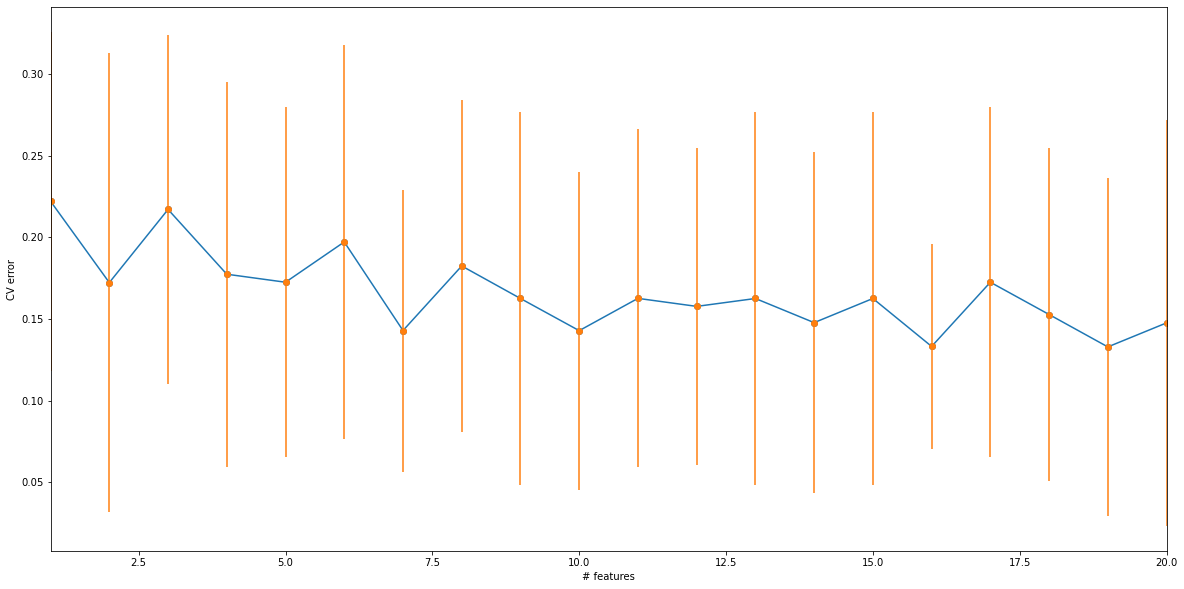

In [65]:
number_features = number_features[::-1]

plt.figure(figsize=(20, 10))
plt.plot(number_features,cv_error,'-o')
plt.errorbar(number_features, cv_error, yerr=cv_std, fmt='o')
plt.xlabel('# features')
plt.xlim(1,20)
plt.ylabel('CV error')

plt.show()

## 7 features Random forest

### [ 0 ,19  ,2  ,3 ,18 ,17  ,6]

In [67]:
print('Features selected :')
print('')
for i in [ 0 ,19 ,2 ,3 ,18 ,17 ,6]:
    print(X.columns[i])

Features selected :

MDVP:Fo(Hz)
PPE
MDVP:Flo(Hz)
MDVP:Jitter(%)
D2
spread2
Jitter:DDP


- - -

## Feature extraction

In order to create new features, we perform PCA transformation over the variables we already have, getting a lower dimensional space that tries to keep as much as possible the variance from the data. 

#### PCA 

In [68]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

DT = DecisionTreeClassifier(max_depth= 3, min_samples_leaf= 15, min_samples_split = 25,
                            random_state = 1)

RFC = RandomForestClassifier(max_depth= 4, min_samples_leaf= 1, min_samples_split = 25,
                             n_estimators = 25,  random_state = 1)

kNN = KNeighborsClassifier(n_neighbors= 1, weights = 'uniform')

r2_score = [] 
n_components_max = X_train_norm_scaler.shape[1]
for i in range(n_components_max):
    X_train_pca = PCA(n_components=i+1).fit_transform(X_train_norm_scaler)
    DT =  DT.fit(X_train_pca, Y_train)
    X_test_pca = PCA(n_components=i+1).fit_transform(X_test_norm_scaler)
    r2_score.append(DT.score(X_test_pca, Y_test))
    
    
r2_score_2 = [] 
n_components_max_2 = X_train_norm_scaler.shape[1]
for i in range(n_components_max_2):
    X_train_pca = PCA(n_components=i+1).fit_transform(X_train_norm_scaler)
    RFC =  RFC.fit(X_train_pca, Y_train)
    X_test_pca = PCA(n_components=i+1).fit_transform(X_test_norm_scaler)
    r2_score_2.append(RFC.score(X_test_pca, Y_test))
    
r2_score_3 = [] 
n_components_max_3 = X_train_norm_scaler.shape[1]
for i in range(n_components_max_3):
    X_train_pca = PCA(n_components=i+1).fit_transform(X_train_norm_scaler)
    kNN =  kNN.fit(X_train_pca, Y_train)
    X_test_pca = PCA(n_components=i+1).fit_transform(X_test_norm_scaler)
    r2_score_3.append(kNN.score(X_test_pca, Y_test))

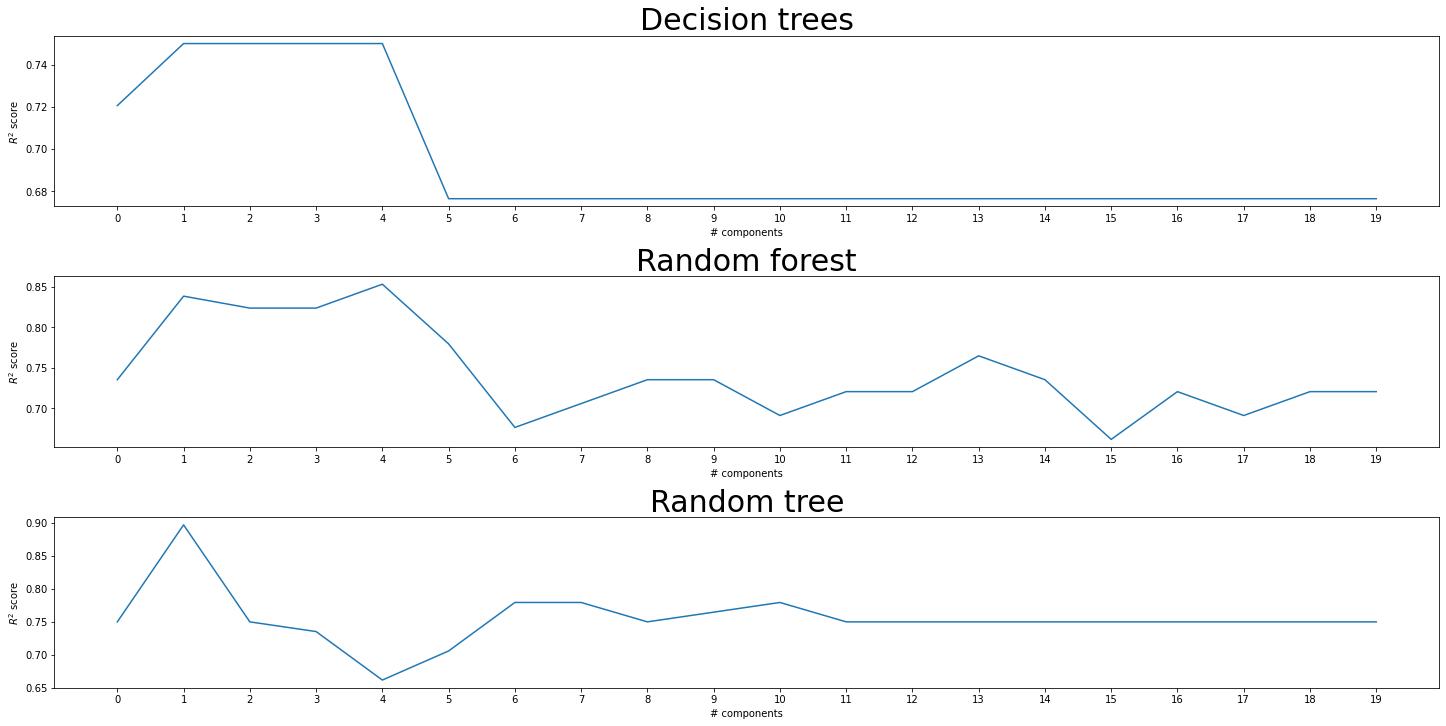

In [69]:
plt.figure(figsize=(20, 10))

plt.subplot(3,1,1)
plt.plot(range(0, X_train_norm_scaler.shape[1]),r2_score)
plt.xticks(range(0,X_train_norm_scaler.shape[1] ), rotation=0, fontsize = 10)
plt.xlabel('# components')
plt.ylabel('$R^2$ score')
plt.title('Decision trees', fontsize = 30)


plt.subplot(3,1,2)
plt.plot(range(0, X_train_norm_scaler.shape[1]),r2_score_2)
plt.xticks(range(0,X_train_norm_scaler.shape[1] ), rotation=0, fontsize = 10)
plt.xlabel('# components')
plt.ylabel('$R^2$ score')
plt.title('Random forest', fontsize = 30)


plt.subplot(3,1,3)
plt.plot(range(0, X_train_norm_scaler.shape[1]),r2_score_3)
plt.xticks(range(0,X_train_norm_scaler.shape[1] ), rotation=0, fontsize = 10)
plt.xlabel('# components')
plt.ylabel('$R^2$ score')
plt.title('Random tree', fontsize = 30)


plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

After having analyzed the results plotted in the graphics above, we decide to select as number of components one. 

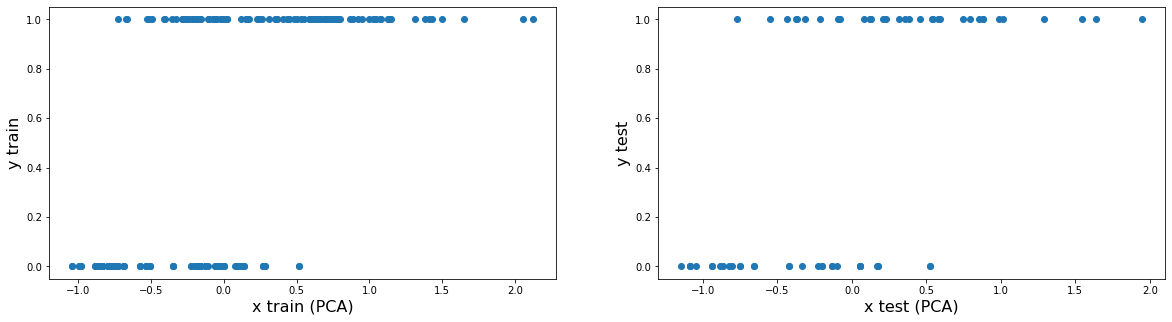

In [70]:
X_train_pca = PCA(n_components=1).fit_transform(X_train_norm_scaler)
X_test_pca = PCA(n_components=1).fit_transform(X_test_norm_scaler)


plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.scatter(X_train_pca[:,0] ,Y_train)
plt.xlabel('x train (PCA)',fontsize=16)
plt.ylabel('y train',fontsize=16)

plt.subplot(1,2,2)
plt.scatter(X_test_pca[:,0] , Y_test)
plt.xlabel('x test (PCA)',fontsize=16)
plt.ylabel('y test',fontsize=16)

plt.show()

In [71]:
print('Shapes of x PCA : ', X_train_pca.shape, X_test_pca.shape)

Shapes of x PCA :  (202, 1) (68, 1)


# 6.- Results

# Performance evalutation 

### Data:

* ML models :
    * Decision trees
    * Random forest
    * K-nn
    
* Data :
    * Max-min normalization
    * Standarization
    * PCA component
    
* Features :
    * All 
    * PCA
    * From feature selection 
        * Embeed methods
        * Wrapper methods
        * Metrics for featuring : MI
            
            
* Metrics for performance :
    * Accuracy
    * Confusion matrix

In [72]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score


def measures_from_conf_matrix(confusion_matrix):
    TP = confusion_matrix[0][0]
    FN = confusion_matrix[0][1]
    FP = confusion_matrix[1][0]
    TN = confusion_matrix[1][1]
    print('TP = ', TP)
    print('FN = ', FN)
    print('FP = ', FP)
    print('TN = ', TN)
    sensitivity = TP/(TP+FN)
    print('Sensitivity = ',sensitivity)
    specifity = TN/(TN+FP)
    print('Specifity = ',specifity)
    return 

X = data_no_outl_balanced[features_to_plot]
Y = data_no_outl_balanced['status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print('Shapes of training sets : ', X_train.shape, Y_train.shape)
print('Shapes of test sets : ', X_test.shape, Y_test.shape)


# Normalization
max_min = preprocessing.MinMaxScaler().fit(X_train)
X_train_norm_scaler = max_min.transform(X_train)
X_test_norm_scaler = max_min.transform(X_test)
# Standarization
std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm_std_scaler = std_scaler.transform(X_train)
X_test_norm_std_scaler = std_scaler.transform(X_test)
#PCA
X_train_pca = PCA(n_components=1).fit_transform(X_train_norm_scaler)
X_test_pca = PCA(n_components=1).fit_transform(X_test_norm_scaler)



## Models

#Decision tree
DT = DecisionTreeClassifier(max_depth= 3, min_samples_leaf= 15, min_samples_split = 25,
                            random_state = 1)

#Random forest
RFC = RandomForestClassifier(max_depth= 4, min_samples_leaf= 1, min_samples_split = 25,
                             n_estimators = 25,  random_state = 1)

#K-nn
kNN = KNeighborsClassifier(n_neighbors= 1, weights = 'uniform')

Shapes of training sets :  (202, 20) (202,)
Shapes of test sets :  (68, 20) (68,)


---

# All features

In [74]:
print('PCA')
print('')
print('DT')
DT_PCA = DT.fit(X_train_pca, Y_train)
DT_predict_PCA = DT_PCA.predict(X_test_pca)

accuracy_score_DT_max_min  = accuracy_score(Y_test, DT_predict_PCA)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, DT_predict_PCA)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

print('')
print('RF')
RFC_PCA = RFC.fit(X_train_pca, Y_train)
RFC_predict_PCA = RFC_PCA.predict(X_test_pca)

accuracy_score_DT_max_min  = accuracy_score(Y_test, RFC_predict_PCA)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, RFC_predict_PCA)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

print('')
print('K-nn')
kNN_PCA = kNN.fit(X_train_pca, Y_train)
kNN_predict_PCA = kNN_PCA.predict(X_test_pca)

accuracy_score_DT_max_min  = accuracy_score(Y_test, kNN_predict_PCA)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, kNN_predict_PCA)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

PCA

DT
Accuracy =  0.6470588235294118
TP =  26
FN =  6
FP =  18
TN =  18
Sensitivity =  0.8125
Specifity =  0.5

RF
Accuracy =  0.6176470588235294
TP =  25
FN =  7
FP =  19
TN =  17
Sensitivity =  0.78125
Specifity =  0.4722222222222222

K-nn
Accuracy =  0.6029411764705882
TP =  14
FN =  18
FP =  9
TN =  27
Sensitivity =  0.4375
Specifity =  0.75


KNN-COMPARATIVE TABLE:

| KNN model | Accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
|Max-Min norm |  0.9559  | 28 | 0 | 3 | 37 | 1.0 | 0.925 |
|Std norm |  0.9265  | 27 | 1 | 4 | 36 | 0.9643 | 0.9 |
|PCA|  0.6029  | 14 | 18 | 9 | 27 | 0.4375 | 0.75 |

DECISION TREES-COMPARATIVE TABLE:

| Decision Tree model | Accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
|Max-Min norm |  0.9265  | 26 | 2 | 3 | 37 | 0.9286 | 0.925 |
|Std norm |  0.9265  | 26 | 2 | 3 | 37 | 0.9286 | 0.925 |
|PCA |  0.6470  | 26 | 6 | 18 | 18 | 0.8125 | 0.5 |

Random Forest-COMPARATIVE TABLE:

| Random Forest model | Accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
|Max-Min norm |  0.9559  | 27 | 1 | 2 | 38 | 0.9653 | 0.95 |
|Std norm |  0.9265  | 26 | 2 | 3 | 37 | 0.9286 | 0.925 |
|PCA |  0.6176  | 25 | 7 | 19 | 17 | 0.78125 | 0.472 |

---

# MI

* MDVP:Fo(Hz)
* PPE

In [104]:
X = data_no_outl_balanced[['MDVP:Fo(Hz)','PPE']]
Y = data_no_outl_balanced['status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print('Shapes of training sets : ', X_train.shape, Y_train.shape)
print('Shapes of test sets : ', X_test.shape, Y_test.shape)


# Normalization
max_min = preprocessing.MinMaxScaler().fit(X_train)
X_train_norm_scaler = max_min.transform(X_train)
X_test_norm_scaler = max_min.transform(X_test)
# Standarization
std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm_std_scaler = std_scaler.transform(X_train)
X_test_norm_std_scaler = std_scaler.transform(X_test)
#PCA
X_train_pca = PCA(n_components=1).fit_transform(X_train_norm_scaler)
X_test_pca = PCA(n_components=1).fit_transform(X_test_norm_scaler)

Shapes of training sets :  (202, 2) (202,)
Shapes of test sets :  (68, 2) (68,)


In [105]:
print('K-nn')
print('Max_min_normalization')
print('')
kNN_max_min = kNN.fit(X_train_norm_scaler, Y_train)
kNN_predict_max_min = kNN_max_min.predict(X_test_norm_scaler)

accuracy_score_DT_max_min  = accuracy_score(Y_test, kNN_predict_max_min)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, kNN_predict_max_min)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)
print('')
print('Std_normalization')
print('')
kNN_std = kNN.fit(X_train_norm_std_scaler, Y_train)
kNN_predict_std = kNN_std.predict(X_test_norm_std_scaler)

accuracy_score_DT_max_min  = accuracy_score(Y_test, kNN_predict_std)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, kNN_predict_std)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

print('')
print('PCA')
print('')
kNN_PCA = kNN.fit(X_train_pca, Y_train)
kNN_predict_PCA = kNN_PCA.predict(X_test_pca)

accuracy_score_DT_max_min  = accuracy_score(Y_test, kNN_predict_PCA)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, kNN_predict_PCA)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

K-nn
Max_min_normalization

Accuracy =  0.9558823529411765
TP =  39
FN =  0
FP =  3
TN =  26
Sensitivity =  1.0
Specifity =  0.896551724137931

Std_normalization

Accuracy =  0.9558823529411765
TP =  39
FN =  0
FP =  3
TN =  26
Sensitivity =  1.0
Specifity =  0.896551724137931

PCA

Accuracy =  0.7205882352941176
TP =  22
FN =  17
FP =  2
TN =  27
Sensitivity =  0.5641025641025641
Specifity =  0.9310344827586207


In [106]:
print('DT')
print('Max_min_normalization')
print('')
DT_max_min = DT.fit(X_train_norm_scaler, Y_train)
DT_predict_max_min = DT_max_min.predict(X_test_norm_scaler)

accuracy_score_DT_max_min  = accuracy_score(Y_test, DT_predict_max_min)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, DT_predict_max_min)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

print('')
print('Std_normalization')
print('')
DT_std = DT.fit(X_train_norm_std_scaler, Y_train)
DT_predict_std = DT_std.predict(X_test_norm_std_scaler)

accuracy_score_DT_max_min  = accuracy_score(Y_test, DT_predict_std)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, DT_predict_std)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

print('')
print('PCA')
print('')
DT_PCA = DT.fit(X_train_pca, Y_train)
DT_predict_PCA = DT_PCA.predict(X_test_pca)

accuracy_score_DT_max_min  = accuracy_score(Y_test, DT_predict_PCA)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, DT_predict_PCA)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

DT
Max_min_normalization

Accuracy =  0.8529411764705882
TP =  33
FN =  6
FP =  4
TN =  25
Sensitivity =  0.8461538461538461
Specifity =  0.8620689655172413

Std_normalization

Accuracy =  0.8529411764705882
TP =  33
FN =  6
FP =  4
TN =  25
Sensitivity =  0.8461538461538461
Specifity =  0.8620689655172413

PCA

Accuracy =  0.7205882352941176
TP =  28
FN =  11
FP =  8
TN =  21
Sensitivity =  0.717948717948718
Specifity =  0.7241379310344828


In [107]:
print('RF')
print('Max_min_normalization')
print('')
RFC_max_min = RFC.fit(X_train_norm_scaler, Y_train)
RFC_predict_max_min = RFC_max_min.predict(X_test_norm_scaler)

accuracy_score_DT_max_min  = accuracy_score(Y_test, RFC_predict_max_min)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, RFC_predict_max_min)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

print('')
print('Std_normalization')
print('')
RFC_std = RFC.fit(X_train_norm_std_scaler, Y_train)
RFC_predict_std = RFC_std.predict(X_test_norm_std_scaler)
accuracy_score_DT_max_min  = accuracy_score(Y_test, RFC_predict_std)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, RFC_predict_std)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

print('')
print('PCA')
print('')
RFC_PCA = RFC.fit(X_train_pca, Y_train)
RFC_predict_PCA = RFC_PCA.predict(X_test_pca)
accuracy_score_DT_max_min  = accuracy_score(Y_test, RFC_predict_PCA)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, RFC_predict_PCA)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

RF
Max_min_normalization

Accuracy =  0.8823529411764706
TP =  34
FN =  5
FP =  3
TN =  26
Sensitivity =  0.8717948717948718
Specifity =  0.896551724137931

Std_normalization

Accuracy =  0.8823529411764706
TP =  34
FN =  5
FP =  3
TN =  26
Sensitivity =  0.8717948717948718
Specifity =  0.896551724137931

PCA

Accuracy =  0.7352941176470589
TP =  23
FN =  16
FP =  2
TN =  27
Sensitivity =  0.5897435897435898
Specifity =  0.9310344827586207


KNN-COMPARATIVE TABLE:

| KNN model | Accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
|Max-Min norm |  0.9559  | 39 | 0 | 3 | 26 | 1.0 | 0.8966 |
|Std norm |  0.9559  | 39 | 0 | 3 | 26 | 1.0 | 0.8966 |
|PCA|  0.7206  | 22 | 17 | 2 | 27 | 0.5641 | 0.9310 |

DECISION TREES-COMPARATIVE TABLE:

| Decision Tree model | Accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
|Max-Min norm |  0.8529  | 33 | 6 | 4 | 25 | 0.8462 | 0.8621 |
|Std norm |  0.8529  | 33 | 6 | 4 | 25 | 0.8462 | 0.8621 |
|PCA |  0.7206  | 28 | 11 | 8 | 21 | 0.7179 | 0.7241 |

Random Forest-COMPARATIVE TABLE:

| Random Forest model | Accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
|Max-Min norm |  0.8824  | 34 | 5 | 3 | 26 | 0.8718 | 0.8966 |
|Std norm |  0.8824  | 34 | 5 | 3 | 26 | 0.8718 | 0.8966 |
|PCA |  0.7353  | 23 | 16 | 2 | 27 | 0.5897 | 0.9310 |

---

# Embeed method features selected

* DT:
    * MDVP:Fo(Hz)
    * PPE
    * Shimmer:APQ5

* RF:
    * MDVP:Fo(Hz)
    * spread1

### DT

In [108]:
X = data_no_outl_balanced[['MDVP:Fo(Hz)','PPE','Shimmer:APQ5']]
Y = data_no_outl_balanced['status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print('Shapes of training sets : ', X_train.shape, Y_train.shape)
print('Shapes of test sets : ', X_test.shape, Y_test.shape)


# Normalization
max_min = preprocessing.MinMaxScaler().fit(X_train)
X_train_norm_scaler = max_min.transform(X_train)
X_test_norm_scaler = max_min.transform(X_test)
# Standarization
std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm_std_scaler = std_scaler.transform(X_train)
X_test_norm_std_scaler = std_scaler.transform(X_test)
#PCA
X_train_pca = PCA(n_components=1).fit_transform(X_train_norm_scaler)
X_test_pca = PCA(n_components=1).fit_transform(X_test_norm_scaler)

Shapes of training sets :  (202, 3) (202,)
Shapes of test sets :  (68, 3) (68,)


In [109]:
print('DT')
print('Max_min_normalization')
print('')
DT_max_min = DT.fit(X_train_norm_scaler, Y_train)
DT_predict_max_min = DT_max_min.predict(X_test_norm_scaler)

accuracy_score_DT_max_min  = accuracy_score(Y_test, DT_predict_max_min)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, DT_predict_max_min)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

print('')
print('Std_normalization')
print('')
DT_std = DT.fit(X_train_norm_std_scaler, Y_train)
DT_predict_std = DT_std.predict(X_test_norm_std_scaler)

accuracy_score_DT_max_min  = accuracy_score(Y_test, DT_predict_std)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, DT_predict_std)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

print('')
print('PCA')
print('')
DT_PCA = DT.fit(X_train_pca, Y_train)
DT_predict_PCA = DT_PCA.predict(X_test_pca)

accuracy_score_DT_max_min  = accuracy_score(Y_test, DT_predict_PCA)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, DT_predict_PCA)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

DT
Max_min_normalization

Accuracy =  0.8823529411764706
TP =  27
FN =  5
FP =  3
TN =  33
Sensitivity =  0.84375
Specifity =  0.9166666666666666

Std_normalization

Accuracy =  0.8823529411764706
TP =  27
FN =  5
FP =  3
TN =  33
Sensitivity =  0.84375
Specifity =  0.9166666666666666

PCA

Accuracy =  0.7647058823529411
TP =  18
FN =  14
FP =  2
TN =  34
Sensitivity =  0.5625
Specifity =  0.9444444444444444


### RF

In [110]:
X = data_no_outl_balanced[['MDVP:Fo(Hz)','spread1']]
Y = data_no_outl_balanced['status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print('Shapes of training sets : ', X_train.shape, Y_train.shape)
print('Shapes of test sets : ', X_test.shape, Y_test.shape)


# Normalization
max_min = preprocessing.MinMaxScaler().fit(X_train)
X_train_norm_scaler = max_min.transform(X_train)
X_test_norm_scaler = max_min.transform(X_test)
# Standarization
std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm_std_scaler = std_scaler.transform(X_train)
X_test_norm_std_scaler = std_scaler.transform(X_test)
#PCA
X_train_pca = PCA(n_components=1).fit_transform(X_train_norm_scaler)
X_test_pca = PCA(n_components=1).fit_transform(X_test_norm_scaler)

Shapes of training sets :  (202, 2) (202,)
Shapes of test sets :  (68, 2) (68,)


In [111]:
print('RF')
print('Max_min_normalization')
print('')
RFC_max_min = RFC.fit(X_train_norm_scaler, Y_train)
RFC_predict_max_min = RFC_max_min.predict(X_test_norm_scaler)

accuracy_score_DT_max_min  = accuracy_score(Y_test, RFC_predict_max_min)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, RFC_predict_max_min)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

print('')
print('Std_normalization')
print('')
RFC_std = RFC.fit(X_train_norm_std_scaler, Y_train)
RFC_predict_std = RFC_std.predict(X_test_norm_std_scaler)
accuracy_score_DT_max_min  = accuracy_score(Y_test, RFC_predict_std)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, RFC_predict_std)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

print('')
print('PCA')
print('')
RFC_PCA = RFC.fit(X_train_pca, Y_train)
RFC_predict_PCA = RFC_PCA.predict(X_test_pca)
accuracy_score_DT_max_min  = accuracy_score(Y_test, RFC_predict_PCA)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, RFC_predict_PCA)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

RF
Max_min_normalization

Accuracy =  0.8235294117647058
TP =  28
FN =  7
FP =  5
TN =  28
Sensitivity =  0.8
Specifity =  0.8484848484848485

Std_normalization

Accuracy =  0.8235294117647058
TP =  28
FN =  7
FP =  5
TN =  28
Sensitivity =  0.8
Specifity =  0.8484848484848485

PCA

Accuracy =  0.4264705882352941
TP =  8
FN =  27
FP =  12
TN =  21
Sensitivity =  0.22857142857142856
Specifity =  0.6363636363636364


DECISION TREES-COMPARATIVE TABLE:

| Decision Tree model | Accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
|Max-Min norm |  0.8823  | 27 | 5 | 3 | 33 | 0.8437 | 0.9166 |
|Std norm |  0.8823  | 27 | 5 | 3 | 33 | 0.8437 | 0.9166 |
|PCA |  0.7647  | 28 | 11 | 8 | 21 | 0.7179 | 0.7241 |

Random Forest-COMPARATIVE TABLE:

| Random Forest model | Accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
|Max-Min norm |  0.8235  | 28 | 7 | 5 | 28 | 0.8 | 0.8484 |
|Std norm |  0.8235  | 28 | 7 | 5 | 28 | 0.8 | 0.8484 |
|PCA |  0.4264  | 18 | 14 | 2 | 34 | 0.5625 | 0.9444 |

---

# Wrapper method : features selected from each model

In [75]:
columns_knn_feature_selection = [0 ,19 ,2]
columns_knn = []
for i in columns_knn_feature_selection:
    columns_knn.append(features_to_plot[i])
print('K-nn features selected : ', columns_knn)
print('')
columns_dt_feature_selection = [ 0 ,19 ,2 ,3 ,18 ,17 ,6 ,12 ,14 ,15]
columns_dt = []
for i in columns_dt_feature_selection:
    columns_dt.append(features_to_plot[i])
print('Decision trees features selected : ', columns_dt)
print('')
columns_rf_feature_selection = [ 0 ,19 ,2 ,3 ,18 ,17 ,6]
columns_rf = []
for i in columns_rf_feature_selection:
    columns_rf.append(features_to_plot[i])
print('Random forest features selected : ', columns_rf)    

K-nn features selected :  ['MDVP:Fo(Hz)', 'PPE', 'MDVP:Flo(Hz)']

Decision trees features selected :  ['MDVP:Fo(Hz)', 'PPE', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'D2', 'spread2', 'Jitter:DDP', 'NHR', 'RPDE', 'DFA']

Random forest features selected :  ['MDVP:Fo(Hz)', 'PPE', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'D2', 'spread2', 'Jitter:DDP']


### K-NN features selected

In [81]:
X = data_no_outl_balanced[columns_knn]
Y = data_no_outl_balanced['status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print('Shapes of training sets : ', X_train.shape, Y_train.shape)
print('Shapes of test sets : ', X_test.shape, Y_test.shape)


# Normalization
max_min = preprocessing.MinMaxScaler().fit(X_train)
X_train_norm_scaler = max_min.transform(X_train)
X_test_norm_scaler = max_min.transform(X_test)
# Standarization
std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm_std_scaler = std_scaler.transform(X_train)
X_test_norm_std_scaler = std_scaler.transform(X_test)
#PCA
X_train_pca = PCA(n_components=1).fit_transform(X_train_norm_scaler)
X_test_pca = PCA(n_components=1).fit_transform(X_test_norm_scaler)

Shapes of training sets :  (202, 3) (202,)
Shapes of test sets :  (68, 3) (68,)


In [82]:
print('Max_min_normalization')
print('')
print('K-nn')
kNN_max_min = kNN.fit(X_train_norm_scaler, Y_train)
kNN_predict_max_min = kNN_max_min.predict(X_test_norm_scaler)

accuracy_score_DT_max_min  = accuracy_score(Y_test, kNN_predict_max_min)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, kNN_predict_max_min)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

Max_min_normalization

K-nn
Accuracy =  0.9117647058823529
TP =  32
FN =  2
FP =  4
TN =  30
Sensitivity =  0.9411764705882353
Specifity =  0.8823529411764706


In [83]:
print('Std_normalization')
print('')
print('K-nn')
kNN_std = kNN.fit(X_train_norm_std_scaler, Y_train)
kNN_predict_std = kNN_std.predict(X_test_norm_std_scaler)

accuracy_score_DT_max_min  = accuracy_score(Y_test, kNN_predict_std)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, kNN_predict_std)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

Std_normalization

K-nn
Accuracy =  0.9117647058823529
TP =  32
FN =  2
FP =  4
TN =  30
Sensitivity =  0.9411764705882353
Specifity =  0.8823529411764706


In [84]:
print('PCA')
print('')
print('K-nn')
kNN_PCA = kNN.fit(X_train_pca, Y_train)
kNN_predict_PCA = kNN_PCA.predict(X_test_pca)

accuracy_score_DT_max_min  = accuracy_score(Y_test, kNN_predict_PCA)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, kNN_predict_PCA)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

PCA

K-nn
Accuracy =  0.7205882352941176
TP =  21
FN =  13
FP =  6
TN =  28
Sensitivity =  0.6176470588235294
Specifity =  0.8235294117647058


### Decision tree features selected

In [85]:
X = data_no_outl_balanced[columns_dt]
Y = data_no_outl_balanced['status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print('Shapes of training sets : ', X_train.shape, Y_train.shape)
print('Shapes of test sets : ', X_test.shape, Y_test.shape)


# Normalization
max_min = preprocessing.MinMaxScaler().fit(X_train)
X_train_norm_scaler = max_min.transform(X_train)
X_test_norm_scaler = max_min.transform(X_test)
# Standarization
std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm_std_scaler = std_scaler.transform(X_train)
X_test_norm_std_scaler = std_scaler.transform(X_test)
#PCA
X_train_pca = PCA(n_components=1).fit_transform(X_train_norm_scaler)
X_test_pca = PCA(n_components=1).fit_transform(X_test_norm_scaler)

Shapes of training sets :  (202, 10) (202,)
Shapes of test sets :  (68, 10) (68,)


In [86]:
print('Max_min_normalization')
print('')
print('DT')
DT_max_min = DT.fit(X_train_norm_scaler, Y_train)
DT_predict_max_min = DT_max_min.predict(X_test_norm_scaler)

accuracy_score_DT_max_min  = accuracy_score(Y_test, DT_predict_max_min)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, DT_predict_max_min)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

Max_min_normalization

DT
Accuracy =  0.7794117647058824
TP =  33
FN =  3
FP =  12
TN =  20
Sensitivity =  0.9166666666666666
Specifity =  0.625


In [87]:
print('Std_normalization')
print('')
print('DT')
DT_std = DT.fit(X_train_norm_std_scaler, Y_train)
DT_predict_std = DT_std.predict(X_test_norm_std_scaler)

accuracy_score_DT_max_min  = accuracy_score(Y_test, DT_predict_std)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, DT_predict_std)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

Std_normalization

DT
Accuracy =  0.7794117647058824
TP =  33
FN =  3
FP =  12
TN =  20
Sensitivity =  0.9166666666666666
Specifity =  0.625


In [88]:
print('PCA')
print('')
print('DT')
DT_PCA = DT.fit(X_train_pca, Y_train)
DT_predict_PCA = DT_PCA.predict(X_test_pca)

accuracy_score_DT_max_min  = accuracy_score(Y_test, DT_predict_PCA)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, DT_predict_PCA)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

PCA

DT
Accuracy =  0.3088235294117647
TP =  1
FN =  35
FP =  12
TN =  20
Sensitivity =  0.027777777777777776
Specifity =  0.625


### Random forest features selected

In [89]:
X = data_no_outl_balanced[columns_rf]
Y = data_no_outl_balanced['status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print('Shapes of training sets : ', X_train.shape, Y_train.shape)
print('Shapes of test sets : ', X_test.shape, Y_test.shape)


# Normalization
max_min = preprocessing.MinMaxScaler().fit(X_train)
X_train_norm_scaler = max_min.transform(X_train)
X_test_norm_scaler = max_min.transform(X_test)
# Standarization
std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm_std_scaler = std_scaler.transform(X_train)
X_test_norm_std_scaler = std_scaler.transform(X_test)
#PCA
X_train_pca = PCA(n_components=1).fit_transform(X_train_norm_scaler)
X_test_pca = PCA(n_components=1).fit_transform(X_test_norm_scaler)

Shapes of training sets :  (202, 7) (202,)
Shapes of test sets :  (68, 7) (68,)


In [90]:
print('Max_min_normalization')
print('')
print('RF')
RFC_max_min = RFC.fit(X_train_norm_scaler, Y_train)
RFC_predict_max_min = RFC_max_min.predict(X_test_norm_scaler)

accuracy_score_DT_max_min  = accuracy_score(Y_test, RFC_predict_max_min)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, RFC_predict_max_min)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

Max_min_normalization

RF
Accuracy =  0.8970588235294118
TP =  34
FN =  3
FP =  4
TN =  27
Sensitivity =  0.918918918918919
Specifity =  0.8709677419354839


In [91]:
print('Std_normalization')
print('')
print('RF')
RFC_std = RFC.fit(X_train_norm_std_scaler, Y_train)
RFC_predict_std = RFC_std.predict(X_test_norm_std_scaler)
accuracy_score_DT_max_min  = accuracy_score(Y_test, RFC_predict_std)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, RFC_predict_std)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

Std_normalization

RF
Accuracy =  0.8970588235294118
TP =  34
FN =  3
FP =  4
TN =  27
Sensitivity =  0.918918918918919
Specifity =  0.8709677419354839


In [92]:
print('PCA')
print('')
print('RF')
RFC_PCA = RFC.fit(X_train_pca, Y_train)
RFC_predict_PCA = RFC_PCA.predict(X_test_pca)
accuracy_score_DT_max_min  = accuracy_score(Y_test, RFC_predict_PCA)
print('Accuracy = ',accuracy_score_DT_max_min)
confusion_matrix_DT_max_min = confusion_matrix(Y_test, RFC_predict_PCA)
measures_from_conf_matrix_DT_max_min = measures_from_conf_matrix(confusion_matrix_DT_max_min)

PCA

RF
Accuracy =  0.2647058823529412
TP =  0
FN =  37
FP =  13
TN =  18
Sensitivity =  0.0
Specifity =  0.5806451612903226


KNN-COMPARATIVE TABLE:

| KNN | Test accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
|Max-Min norm | 0.9118  | 32 | 2 | 4 | 30 | 0.9412| 0.8824 |
|Std norm | 0.9118  | 32 | 2 | 4 | 30 | 0.9412| 0.8824 |
| PCA | 0.7206  | 21 | 13  | 6 | 28 | 0.6176| 0.8235 |


DECISION TREES-COMPARATIVE TABLE:

| Deicision Trees | Test accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
|Max-Min norm | 0.7794  | 33 | 3 | 12 | 20 | 0.9166| 0.625 |
|Std Norm | 0.7794  | 33 | 3 | 12 | 20 | 0.9166| 0.625 |
| PCA | 0.3088  | 1 | 35  | 12 | 20 | 0.0278| 0.625 |


Random Forest-COMPARATIVE TABLE:

| Random Trees | Test accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
| Max-Min norm | 0.8971  | 34 | 3 | 4 | 27 | 0.9189| 0.8709 |
| Std norm | 0.8971  | 34 | 3 | 4 | 27 | 0.9189 | 0.8709 |
| PCA | 0.2647  | 0 | 37  | 13 | 18 | 0.0 | 0.5806 |

---

# Tables

# All features

KNN-COMPARATIVE TABLE:

| KNN model | Accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
|Max-Min norm |  0.9559  | 28 | 0 | 3 | 37 | 1.0 | 0.925 |
|Std norm |  0.9265  | 27 | 1 | 4 | 36 | 0.9643 | 0.9 |
|PCA|  0.6029  | 14 | 18 | 9 | 27 | 0.4375 | 0.75 |

DECISION TREES-COMPARATIVE TABLE:

| Decision Tree model | Accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
|Max-Min norm |  0.9265  | 26 | 2 | 3 | 37 | 0.9286 | 0.925 |
|Std norm |  0.9265  | 26 | 2 | 3 | 37 | 0.9286 | 0.925 |
|PCA |  0.6470  | 26 | 6 | 18 | 18 | 0.8125 | 0.5 |

Random Forest-COMPARATIVE TABLE:

| Random Forest model | Accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
|Max-Min norm |  0.9559  | 27 | 1 | 2 | 38 | 0.9653 | 0.95 |
|Std norm |  0.9265  | 26 | 2 | 3 | 37 | 0.9286 | 0.925 |
|PCA |  0.6176  | 25 | 7 | 19 | 17 | 0.78125 | 0.472 |

# MI features

KNN-COMPARATIVE TABLE:

| KNN model | Accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
|Max-Min norm |  0.9559  | 39 | 0 | 3 | 26 | 1.0 | 0.8966 |
|Std norm |  0.9559  | 39 | 0 | 3 | 26 | 1.0 | 0.8966 |
|PCA|  0.7206  | 22 | 17 | 2 | 27 | 0.5641 | 0.9310 |

DECISION TREES-COMPARATIVE TABLE:

| Decision Tree model | Accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
|Max-Min norm |  0.8529  | 33 | 6 | 4 | 25 | 0.8462 | 0.8621 |
|Std norm |  0.8529  | 33 | 6 | 4 | 25 | 0.8462 | 0.8621 |
|PCA |  0.7206  | 28 | 11 | 8 | 21 | 0.7179 | 0.7241 |

Random Forest-COMPARATIVE TABLE:

| Random Forest model | Accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
|Max-Min norm |  0.8824  | 34 | 5 | 3 | 26 | 0.8718 | 0.8966 |
|Std norm |  0.8824  | 34 | 5 | 3 | 26 | 0.8718 | 0.8966 |
|PCA |  0.7353  | 23 | 16 | 2 | 27 | 0.5897 | 0.9310 |

# Embeed features

DECISION TREES-COMPARATIVE TABLE:

| Decision Tree model | Accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
|Max-Min norm |  0.8823  | 27 | 5 | 3 | 33 | 0.8437 | 0.9166 |
|Std norm |  0.8823  | 27 | 5 | 3 | 33 | 0.8437 | 0.9166 |
|PCA |  0.7647  | 28 | 11 | 8 | 21 | 0.7179 | 0.7241 |

Random Forest-COMPARATIVE TABLE:

| Random Forest model | Accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
|Max-Min norm |  0.8235  | 28 | 7 | 5 | 28 | 0.8 | 0.8484 |
|Std norm |  0.8235  | 28 | 7 | 5 | 28 | 0.8 | 0.8484 |
|PCA |  0.4264  | 18 | 14 | 2 | 34 | 0.5625 | 0.9444 |

# Wrapper features

KNN-COMPARATIVE TABLE:

| KNN | Test accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
|Max-Min norm | 0.9118  | 32 | 2 | 4 | 30 | 0.9412| 0.8824 |
|Std norm | 0.9118  | 32 | 2 | 4 | 30 | 0.9412| 0.8824 |
| PCA | 0.7206  | 21 | 13  | 6 | 28 | 0.6176| 0.8235 |


DECISION TREES-COMPARATIVE TABLE:

| Deicision Trees | Test accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
|Max-Min norm | 0.7794  | 33 | 3 | 12 | 20 | 0.9166| 0.625 |
|Std Norm | 0.7794  | 33 | 3 | 12 | 20 | 0.9166| 0.625 |
| PCA | 0.3088  | 1 | 35  | 12 | 20 | 0.0278| 0.625 |


Random Forest-COMPARATIVE TABLE:

| Random Trees | Test accuracy | TP | FN | FP | TN | Sensitivity | Specificity |
|---|---|---|---|---|---|---|---|
| Max-Min norm | 0.8971  | 34 | 3 | 4 | 27 | 0.9189| 0.8709 |
| Std norm | 0.8971  | 34 | 3 | 4 | 27 | 0.9189 | 0.8709 |
| PCA | 0.2647  | 0 | 37  | 13 | 18 | 0.0 | 0.5806 |